## DATA SCIENCE PROJECT ON  INX FUTURE INC EMPLOYEE PERFORMANCE ANALYSIS


## BUSINESS CASE: PREDICT THE PERFOMANCE RATING OF EMPLOYEE


## Importing Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import pylab
import warnings
warnings.filterwarnings("ignore")

## Load the Data

In [2]:
data=pd.read_excel("DATA.xls")

# Domain Analysis

* **EmpNumber:**  An Employee ID, sometimes referred to as an Employee Number or Employee Code, is a unique number that has been assigned to each individual staff member within a company.

* **Age:** This feature represents the age of the employees in the organization. Age can be an important factor in analyzing employee performance as it may impact experience and career progression.

* **Gender:** Gender refers to the employee's sex, typically categorized as male or female. It can be used to analyze gender diversity within the organization and its potential impact on performance.

* **EducationBackground:** This feature describes the educational background of employees, such as their field of study or specialization. It can help in understanding whether specific educational backgrounds correlate with better performance in certain roles.

* **MaritalStatus:** Marital status indicates whether an employee is single, married, divorced, or in another marital status. It can be used to assess whether marital status affects job satisfaction or performance.

* **EmpDepartment:** EmpDepartment refers to the department or division within the organization where the employee works

* **EmpJobRole:** Job role means the key responsibility of a job profile or job position. 

* **BusinessTravelFrequency:** It indicates how frequently employees are required to travel for business purposes

* **DistanceFromHome:** Distance between home to company of employee.

* **EmpEducationLevel:** Employee Education level means the academic qualification. For example, it could be a diploma, degree, masters or PhD.

* **EmpEnvironmentSatisfaction:** This feature measures an employee's satisfaction with their work environment. A higher satisfaction level might correlate with better performance.

* **EmpHourlyRate:** EmpHourlyRate is the hourly rate of pay for each employee. It can be relevant in assessing whether compensation levels influence performance.

* **EmpJobInvolvement:** This feature guesses the level of an employee's job involvement or engagement. Higher job involvement may indicate greater dedication and potentially better performance.

* **EmpJobLevel:** EmpJobLevel represents the job level or hierarchy within the organization. It can help in understanding how seniority relates to performance.

* **EmpJobSatisfaction:** It measures an employee's job satisfaction, which can directly impact performance and attrition.

* **NumCompaniesWorked:** This feature indicates the number of companies an employee has previously worked for. It can be a factor in assessing the impact of prior work experience on performance.

* **OverTime:** OverTime reflects whether an employee works overtime hours. Overtime can affect work-life balance and potentially influence performance.[Yes/No]

* **EmpLastSalaryHikePercent:** This feature represents the percentage of the last salary hike an employee received. It can be relevant in understanding the impact of salary increments on job satisfaction and performance.

* **EmpRelationshipSatisfaction:** This measures an employee's satisfaction with their work relationships. Positive relationships with colleagues and managers can impact performance and job satisfaction.

* **TotalWorkExperienceInYears:** Total experience of employee's in years.

* **TrainingTimesLastYear:** It indicates how many times an employee received training in the last year. Training can enhance skills and potentially improve performance.

* **EmpWorkLifeBalance:** “Work-life balance” typically means the achievement by employees of equality between time spent working and personal life. A good work-life balance for employees can improve staff motivation, increase staff retention rates, reduce absence, attract new talent, and reduce employee stress.

* **ExperienceYearsAtThisCompany:** It represents the number of years an employee has worked at the current organization.

* **ExperienceYearsInCurrentRole:** This feature indicates the number of years an employee has spent in their current role. It can help in understanding the relationship between role stability and performance.

* **YearsSinceLastPromotion:** It represents the number of years since the employee's last promotion. Promotion timelines can impact motivation and performance.

* **YearsWithCurrManager:** This feature indicates the number of years an employee has worked under their current manager. The relationship with a manager can affect performance and job satisfaction. 

* **Attrition:** Attrition refers to whether an employee has left the organization (attrited) or is still employed. It's a crucial factor in understanding employee turnover and its impact on performance.

* **PerformanceRating:** This is the target variable to be predicted or analyzed. It represents the performance rating of employees, which can be used to assess overall employee performance.


## Basic Checks

In [3]:
data.shape

(1200, 28)

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
data.head(15)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3
5,E1001011,27,Male,Life Sciences,Divorced,Development,Developer,Travel_Frequently,10,2,4,32,3,3,1,1,No,21,3,9,4,2,9,7,1,7,No,4
6,E1001016,50,Male,Marketing,Married,Sales,Sales Representative,Travel_Rarely,8,4,4,54,3,1,2,7,No,15,4,4,2,3,2,2,2,2,No,3
7,E1001019,28,Female,Life Sciences,Single,Development,Developer,Travel_Rarely,1,2,1,67,1,1,2,7,Yes,13,4,10,4,3,7,7,3,7,Yes,3
8,E1001020,36,Female,Life Sciences,Married,Development,Developer,Non-Travel,8,3,1,63,4,3,1,9,No,14,1,10,2,3,8,7,0,5,No,3
9,E1001021,38,Female,Life Sciences,Single,Development,Developer,Travel_Rarely,1,3,3,81,3,3,3,4,Yes,14,4,10,4,4,1,0,0,0,No,3


In [6]:
data.tail()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,4,71,4,2,4,1,Yes,20,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,4,80,4,1,4,3,No,17,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,4,74,4,1,3,1,Yes,11,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,4,46,2,3,2,1,No,14,2,9,3,4,8,7,7,7,No,3
1199,E100998,24,Female,Life Sciences,Single,Sales,Sales Executive,Travel_Rarely,3,2,1,65,3,2,3,9,No,14,1,4,3,3,2,2,2,0,Yes,2


In [7]:
data.drop('EmpNumber',axis=1,inplace=True) # since it won't affect the target feature

In [8]:
data.columns

Index(['Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [9]:
data.dtypes

Age                              int64
Gender                          object
EducationBackground             object
MaritalStatus                   object
EmpDepartment                   object
EmpJobRole                      object
BusinessTravelFrequency         object
DistanceFromHome                 int64
EmpEducationLevel                int64
EmpEnvironmentSatisfaction       int64
EmpHourlyRate                    int64
EmpJobInvolvement                int64
EmpJobLevel                      int64
EmpJobSatisfaction               int64
NumCompaniesWorked               int64
OverTime                        object
EmpLastSalaryHikePercent         int64
EmpRelationshipSatisfaction      int64
TotalWorkExperienceInYears       int64
TrainingTimesLastYear            int64
EmpWorkLifeBalance               int64
ExperienceYearsAtThisCompany     int64
ExperienceYearsInCurrentRole     int64
YearsSinceLastPromotion          int64
YearsWithCurrManager             int64
Attrition                

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           1200 non-null   int64 
 1   Gender                        1200 non-null   object
 2   EducationBackground           1200 non-null   object
 3   MaritalStatus                 1200 non-null   object
 4   EmpDepartment                 1200 non-null   object
 5   EmpJobRole                    1200 non-null   object
 6   BusinessTravelFrequency       1200 non-null   object
 7   DistanceFromHome              1200 non-null   int64 
 8   EmpEducationLevel             1200 non-null   int64 
 9   EmpEnvironmentSatisfaction    1200 non-null   int64 
 10  EmpHourlyRate                 1200 non-null   int64 
 11  EmpJobInvolvement             1200 non-null   int64 
 12  EmpJobLevel                   1200 non-null   int64 
 13  EmpJobSatisfaction

In [11]:
num_data=data.select_dtypes(include=["float64","int64"])
print("numerical colums",num_data.columns)


numerical colums Index(['Age', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'PerformanceRating'],
      dtype='object')


In [12]:
cat_data=data.select_dtypes(include=["O"])
print("categorical colums",cat_data.columns)

categorical colums Index(['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment',
       'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition'],
      dtype='object')


In [13]:
for i in cat_data:
    print(i,data[i].unique())
    print(data[i].value_counts())
    print("**********************")

Gender ['Male' 'Female']
Male      725
Female    475
Name: Gender, dtype: int64
**********************
EducationBackground ['Marketing' 'Life Sciences' 'Human Resources' 'Medical' 'Other'
 'Technical Degree']
Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: EducationBackground, dtype: int64
**********************
MaritalStatus ['Single' 'Married' 'Divorced']
Married     548
Single      384
Divorced    268
Name: MaritalStatus, dtype: int64
**********************
EmpDepartment ['Sales' 'Human Resources' 'Development' 'Data Science'
 'Research & Development' 'Finance']
Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: EmpDepartment, dtype: int64
**********************
EmpJobRole ['Sales Executive' 'Manager' 'Developer' 'Sales Representative'
 'Human Resour

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1200.0,36.918333,9.087289,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,1200.0,9.165833,8.176636,1.0,2.0,7.0,14.0,29.0
EmpEducationLevel,1200.0,2.892500,1.044120,1.0,2.0,3.0,4.0,5.0
EmpEnvironmentSatisfaction,1200.0,2.715833,1.090599,1.0,2.0,3.0,4.0,4.0
EmpHourlyRate,1200.0,65.981667,20.211302,30.0,48.0,66.0,83.0,100.0
EmpJobInvolvement,1200.0,2.731667,0.707164,1.0,2.0,3.0,3.0,4.0
EmpJobLevel,1200.0,2.067500,1.107836,1.0,1.0,2.0,3.0,5.0
EmpJobSatisfaction,1200.0,2.732500,1.100888,1.0,2.0,3.0,4.0,4.0
NumCompaniesWorked,1200.0,2.665000,2.469384,0.0,1.0,2.0,4.0,9.0
EmpLastSalaryHikePercent,1200.0,15.222500,3.625918,11.0,12.0,14.0,18.0,25.0


* In numerical features no constant column is present. Since std is not zero for any of the columns.

In [15]:
data.describe(include="O")

,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200
unique,2,6,3,6,19,3,2,2
top,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,725,492,548,373,270,846,847,1022


* In categorical data also no constant column is present. Since there is no column having one unique category.

# Exploratory Data Analysis

## Univariate Analysis

In [16]:
!pip install sweetviz

In [17]:
import sweetviz as sv#importing sweetviz library 
my_report = sv.analyze(data)#syntax to use sweetviz
my_report.show_html()#Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Insights from univariate analysis
* People between the age group 28-41 are the majority.
* 60% are male and the rest 40% are female.
* Majority(40%) of the people are from life science field and 30% are from medical field.
* 50% of the people are married, 30% single and the rest are divorced.
* More than 30% of the people belong to sales, more than 20% belongs to Development and REsearch & Development.
* 65% of the people travel rarely, 18% travel frequently and the rest are non-travelers.
* Almost 50% of the people are nearer to the office i.e the distance from their home is lesser.
* More than 30% of the people have educational qualification of 3 and 4.
* 60% of the people are almost satisfied with environment condition of the office with more than 3 ratings.
* 80% of the people have average work rating.
* 60% of the people have partial involvement in job and 20% have good involvement.
* Above 30% are having joblevel 1 and 2.
* More than 60% employees seem to be satisfied with their job.
* 40% of the people have worked for less than 1 company which implies they are freshers.
* Above 30% of the people have worked in 1 company.
* Above 60% are not doing overtime in a company.




## Bivariate Analysis

In [18]:
data.columns

Index(['Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

### ANALYSIS ON CONTINUOUS FEATURE

**Relation Between age & Experience Years At This Company**

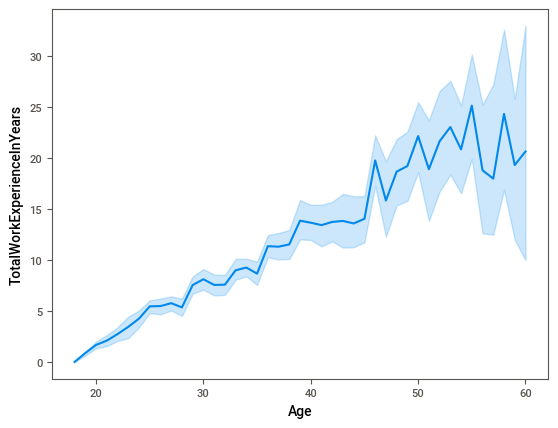

In [19]:
sns.lineplot(x='Age',y='TotalWorkExperienceInYears',data=data)
plt.xlabel('Age',fontsize=10)
plt.show()

* If the age in between 18 to 25 then the total year of experience is less than 5year.
* If the age increases that time experience also increases.

**Relation Between experience year at this company & total work experience**

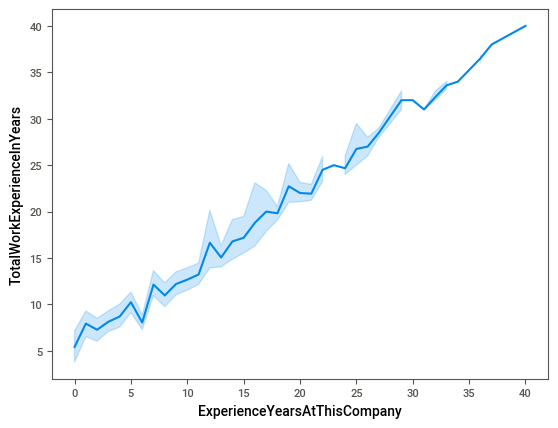

In [20]:
sns.lineplot(x='ExperienceYearsAtThisCompany',y='TotalWorkExperienceInYears',data=data)
plt.xlabel('ExperienceYearsAtThisCompany',fontsize=10)
plt.show()


* If the experiance year at this company increases, the total work experiance in years also increases. 

**Relation between Employee last salary hike and number of company worked**

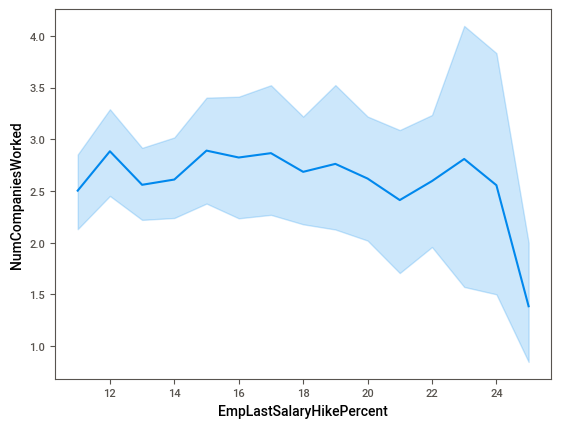

In [21]:
sns.lineplot(x='EmpLastSalaryHikePercent',y='NumCompaniesWorked',data=data)
plt.xlabel('EmpLastSalaryHikePercent',fontsize=10)
plt.show()

* If the employee has work 1 or 2 company that time employee last salary hike percent is increases.

**Relation between Years Since Last Promotion and Experience Years In CurrentRole**

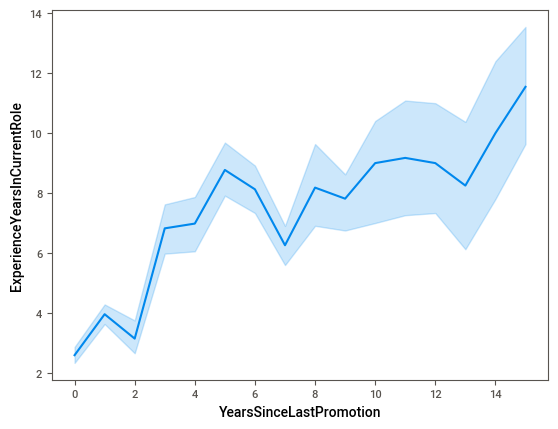

In [22]:
sns.lineplot(x='YearsSinceLastPromotion',y='ExperienceYearsInCurrentRole',data=data)
plt.xlabel('YearsSinceLastPromotion',fontsize=10)
plt.show()

* In above plot clearly seen that year since last promotion is increases that time employee has more experiance with current role

**Relation between Employee Hourly Rate and Years With Current Manager**

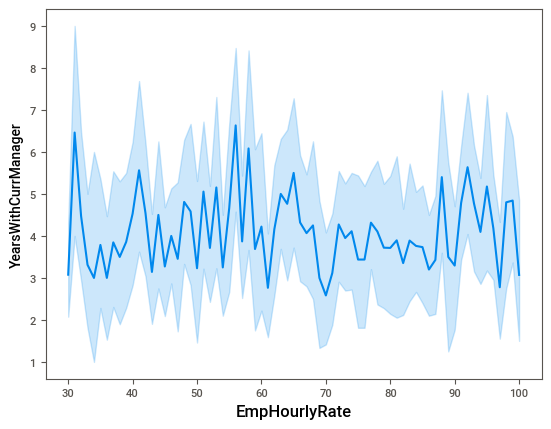

In [23]:
sns.lineplot(x='EmpHourlyRate',y='YearsWithCurrManager',data=data)
plt.xlabel('EmpHourlyRate',fontsize=12)
plt.show()

* most of the employee hourly rate with their current manager is constant,but some of the employees has maximum hourly rate with less number of year with current manager.

**Relation between Distance From Home and Employee Last Salary Hike Percent**

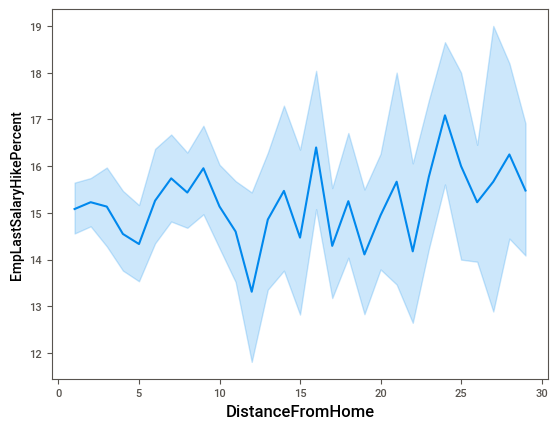

In [24]:
sns.lineplot(x='DistanceFromHome',y='EmpLastSalaryHikePercent',data=data)
plt.xlabel('DistanceFromHome',fontsize=12)
plt.show()

* If the distance from home is more, then the employee salary hike slightly increases.
* When the distance from home is in between 10 to 13, the employee salary hike decreases.

### ANALYSIS ON CATEGORICAL & DISCERETE FEATURE

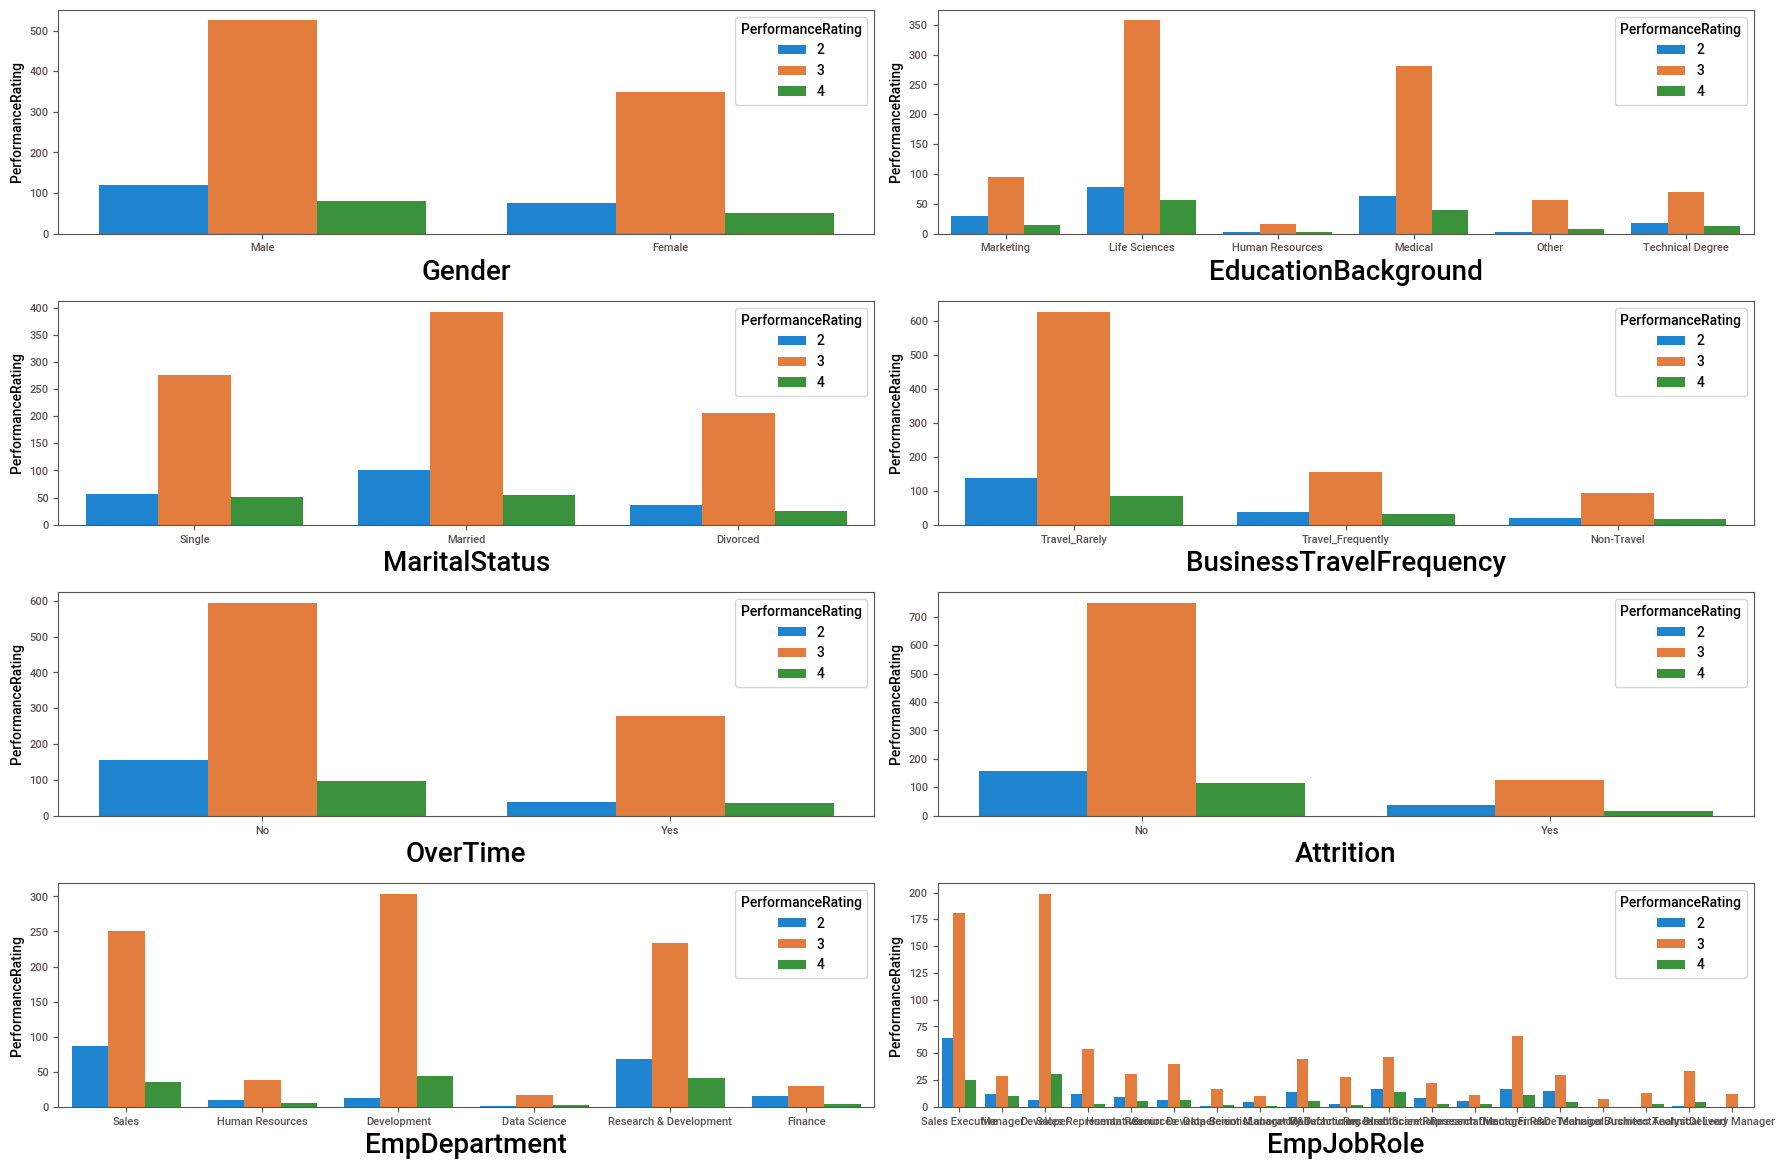

In [25]:
# Make a list of categorical feature and use sub plot to plot multiple feature
categorical_col = data[['Gender','EducationBackground','MaritalStatus','BusinessTravelFrequency','OverTime','Attrition','EmpDepartment','EmpJobRole']]
plt.figure(figsize=(18,20)) # defining canvas size
plotno = 1 # counter

for column in categorical_col: # iteration of columns / acessing the columns from count 
    if plotno<=14:    # set the limit
        plt.subplot(7,2,plotno) # # plotting 6 graphs (3-rows,2-columns) ,plotnumber is for count
        sns.countplot(x=categorical_col[column],hue=data.PerformanceRating) # Plotting count plots because the feature is categorical
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
        plt.ylabel('PerformanceRating')
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction


### Insights:
* Maximum number of male rated with 3 performance rating as well as in female also most of the female rated with 3 performance rating.
* 4 performance rating in both male & female is less.
* Maximum life sciences and medical education background employee rated with 3 performance rating 
* life science and medical education background employee also rated with 2 & 4 performance rating most of the time compared with others left.
* Most of the married employee rated with 3 performance rating as well as single and divorced marital status employee rated with 3 performance rating most of the time.
* In married marital status 2 performance rating employee is more than single or divorced.
* Maximum number of travel rarely employee has get 3 performance rating.
* Those employee travel frequently  also rated with 2, 3, and 4.
* Maximum number of employee with no overtime has rated with 3 perfomance rating.
* Those employee doing overtime, the 2 & 4 performance rating of them is constant.
* Most of the employee rated with 3 performance rating in no means(They are not leaving the company).
* Those employee having 3 performace rating also leaves the company.


* Most of the Development, Sales and Research and development employee department has 3 peformance rating.
* Data science department employee has low performance rating.
* In sales & Research and development department also 2 performance rating employee avilable most of the time.

* Developers and sales executive job role employee performance rating is 3 most of the time.
* In technical architecture and delivery manger job role employee not rated with 2 & 4 performance rating.
* In sales excutive alsso less than 60 employee rated with 2 performance rating.
* Remaining all job role employee has 3 performance rating most of the time.

## Analysis on Numerical Features

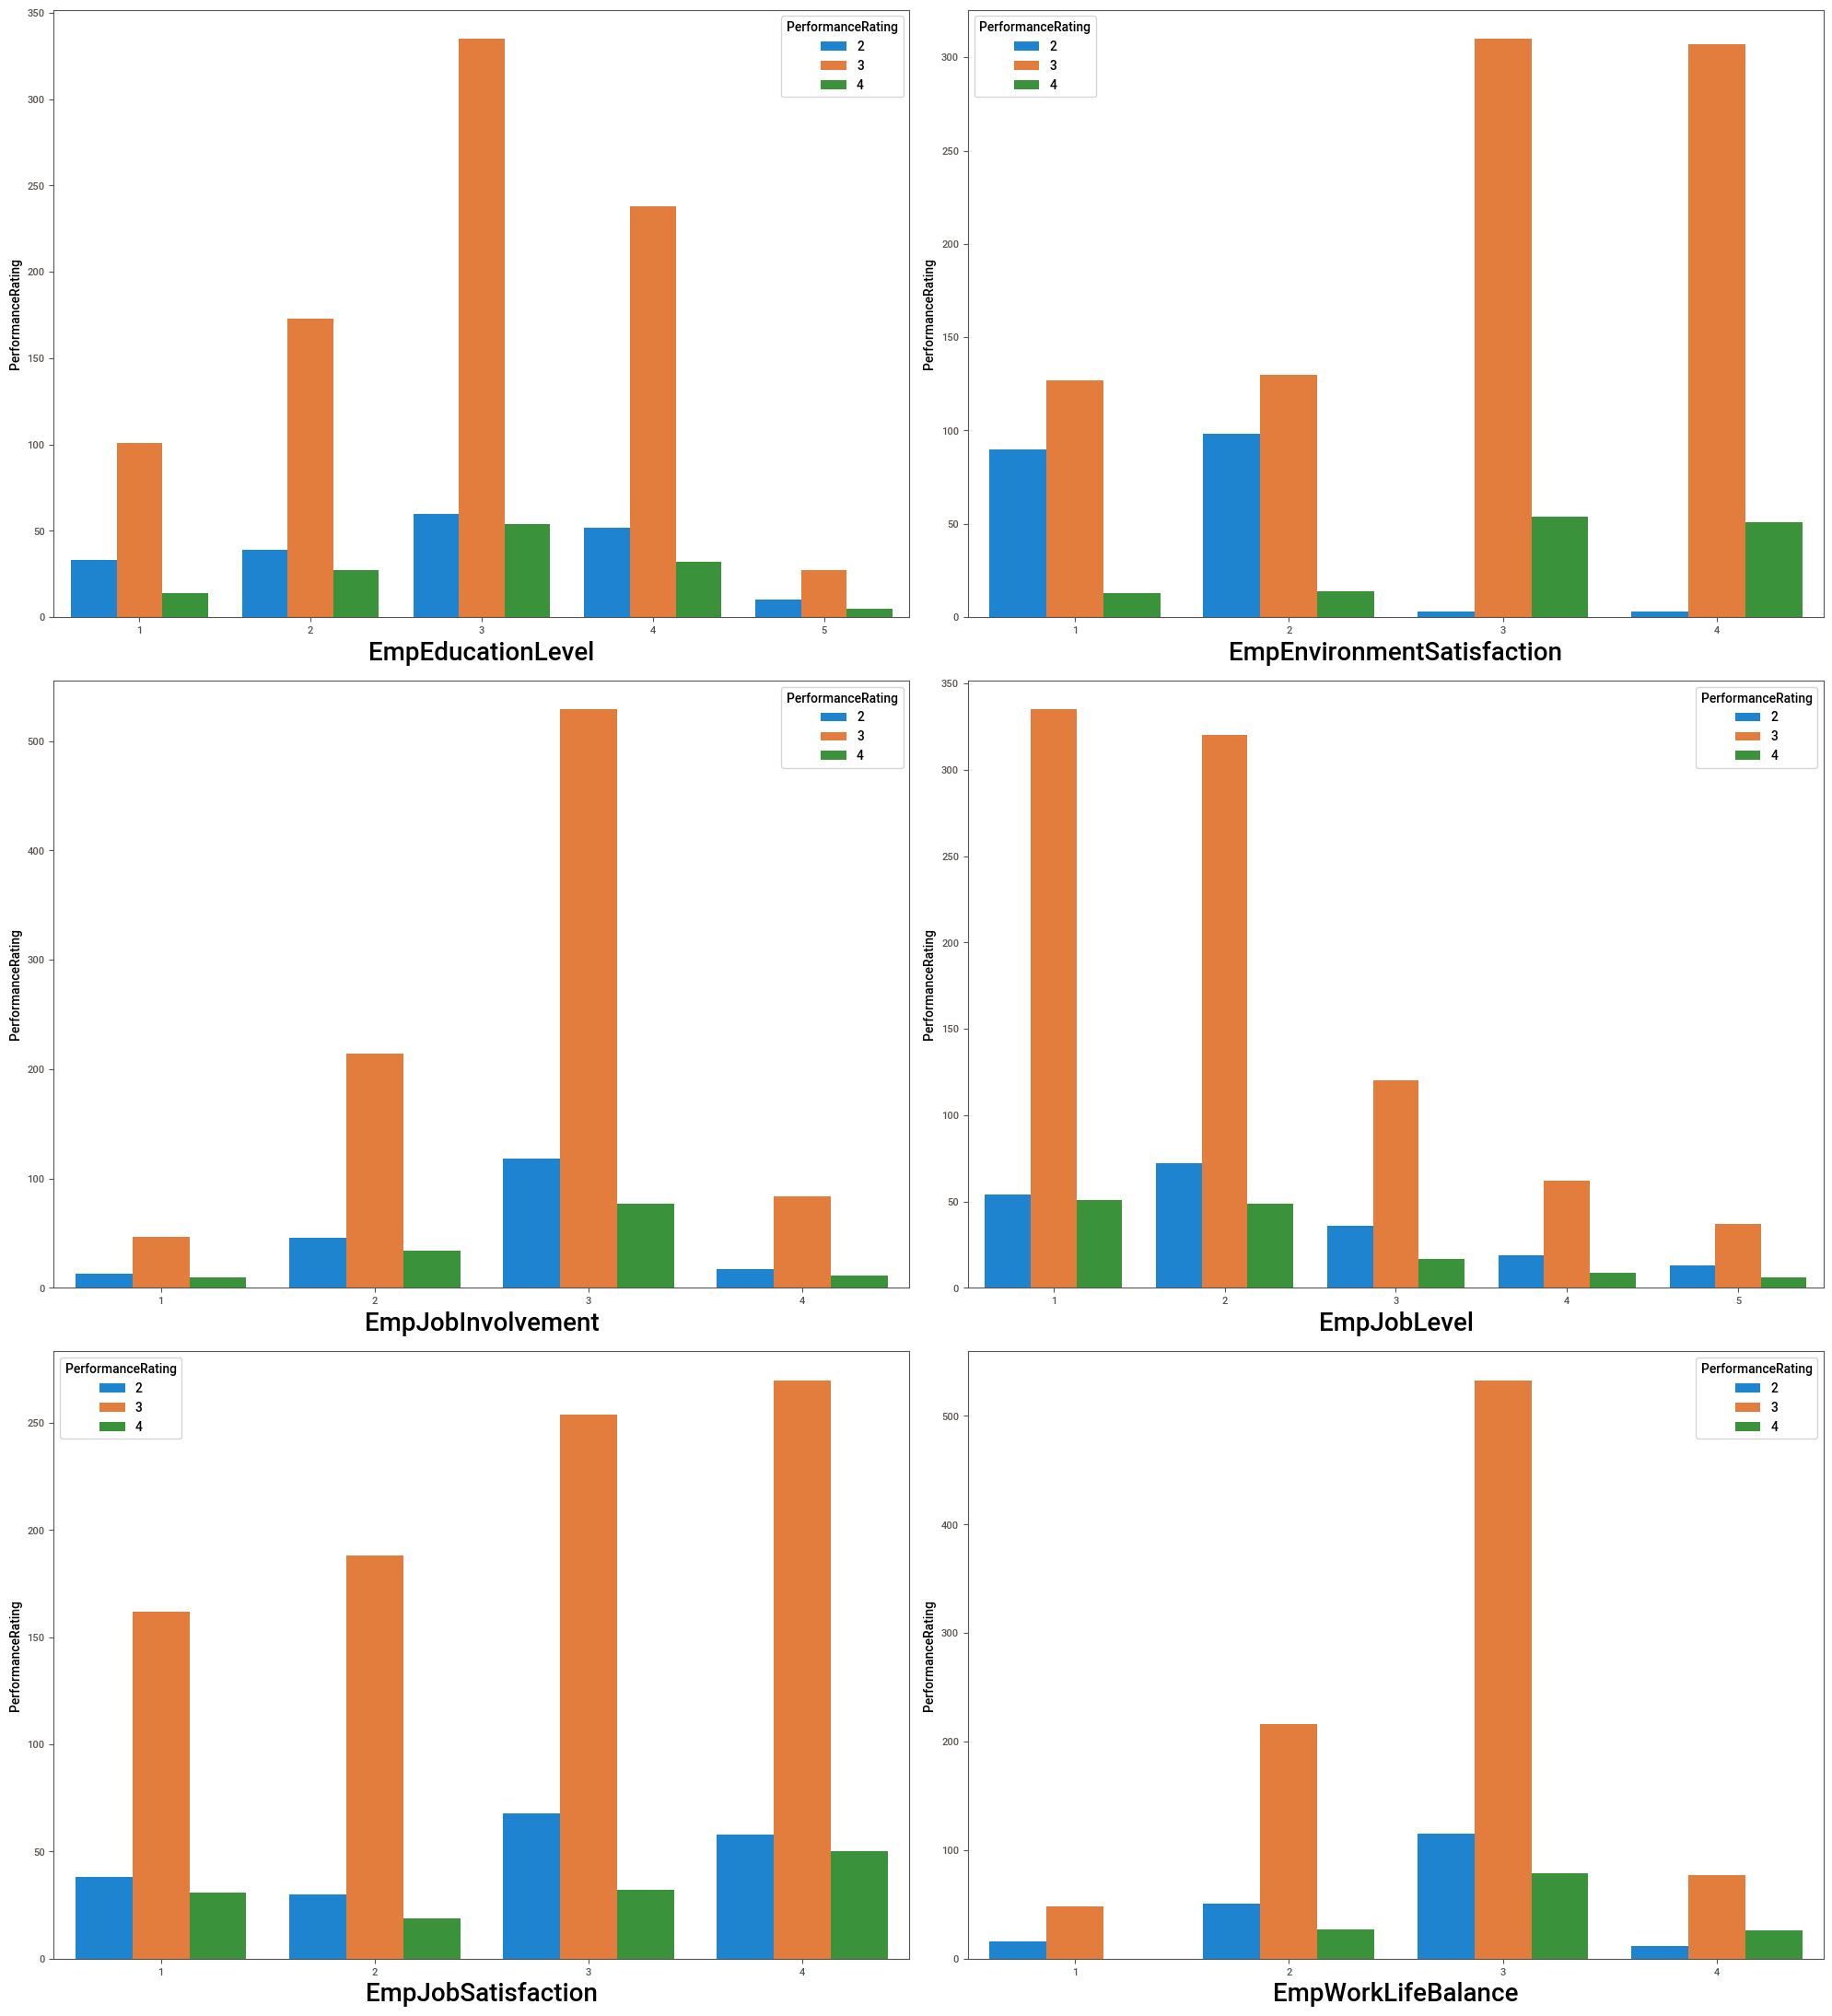

In [26]:
numerical = data[['EmpEducationLevel','EmpEnvironmentSatisfaction','EmpJobInvolvement','EmpJobLevel','EmpJobSatisfaction',
                 'EmpWorkLifeBalance']]

plt.figure(figsize=(20,22)) # defining canvas size
plotno = 1 # counter

for column in numerical: # iteration of columns / acessing the columns from count 
    if plotno<=7:    # set the limit
        plt.subplot(3,2,plotno) # # plotting 6 graphs (3-rows,2-columns) ,plotnumber is for count
        sns.countplot(x=numerical[column],hue=data.PerformanceRating) # Plotting count plots because the feature is categorical
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
        plt.ylabel('PerformanceRating')
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction


### Insights:
* Those employee education level is [3,4 & 2] this employee have 3 peformance rating mostly
* If the performance rating is 2 & 4 then all eduaction level employee is less than 60.

* Maximum no of employee enviorment statifaction is 3 and 4 with 3 performance rating.
* If the employee enviorment satisfaction is 1 & 2 that time the maximum employee have 2 performace rating.
* If the employee enviorment satisfaction is increases that time 4 performance rating also increases.

* Those employee job involvement is 2 & 3 this empluee have 3 performance rating mostly
* 2 & 4 performance rating eployee is less in all job involvment.


* If the employee job level is 1,2 & 3 that time most of the employee have 3 performance rating
* In all job levels 2 & 4 performance rating of all emplyee is less than 60.

* Maximum 4 & 3 job satisfaction employee get 3 performance rating most of the time.
* In all job satisfaction 2 & 4 performance rating is less than 55 employee

* If the employee work life balance is 3 that time maximum no of employee have 3 performance rating.
* If the work life balance is 1 that time no one get 4 performance rating.

## Multivariate

**Relationship between Age & Total work experience with respect to target feature**

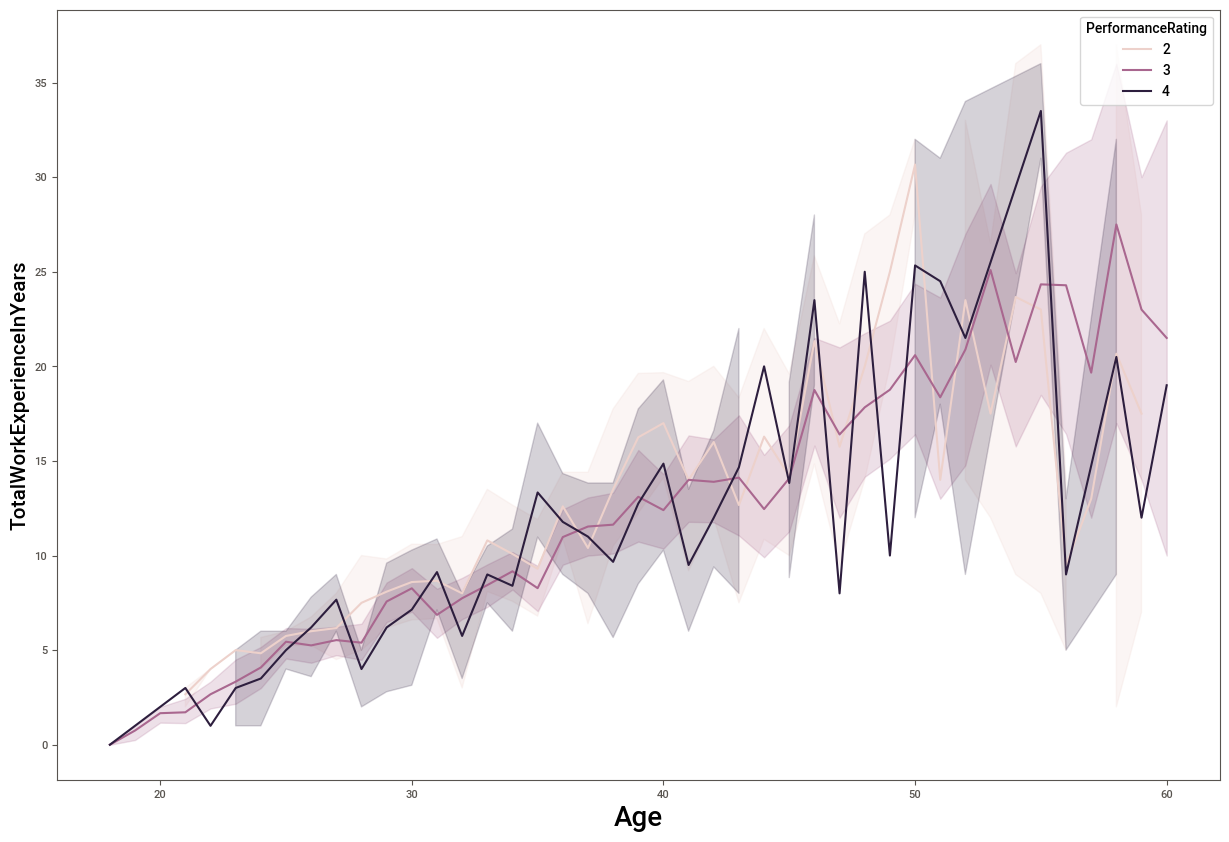

In [27]:
plt.figure(figsize=(15,10))
sns.lineplot(x='Age',y='TotalWorkExperienceInYears',hue=data.PerformanceRating,data=data)
plt.xlabel('Age',fontsize=20)
plt.ylabel('TotalWorkExperienceInYears',fontsize=15)
plt.show()

**Insights:**
* If the age & total experience increases, most of the employee performance rating is 4.
* Low age and minimum year experience employee also 4 perfomace rating.
* At the age of 50 and 30 years, employee have 3 as the performance rating.

**Relationship between Gender & Number Companies Worked with respect to target feature**

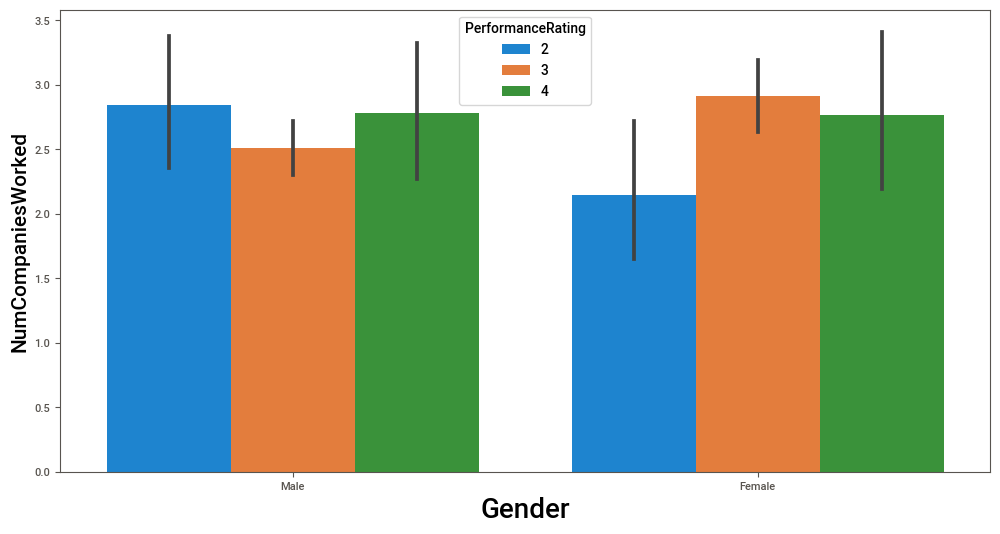

In [28]:
plt.figure(figsize=(12,6))
sns.barplot(x='Gender',y='NumCompaniesWorked',hue=data.PerformanceRating,data=data)
plt.xlabel('Gender',fontsize=20)
plt.ylabel('NumCompaniesWorked',fontsize=15)
plt.show()

**Insights:**
* If the gender is male and the number of companies worked increases,  that time most of the performance rating is 2 & 4.
* If female work in less number of companies, that time performance rating is 2.
* 3 & 4 performance rating in female increases, if the number of companies worked  increases.

**Relationship between MaritalStatus & EmpLastSalaryHikePercent with respect to target feature**

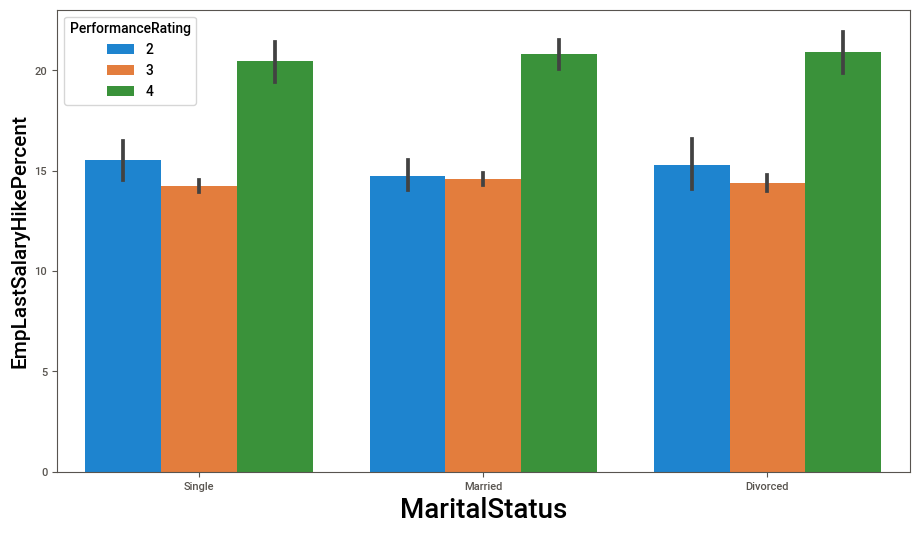

In [29]:
plt.figure(figsize=(11,6))
sns.barplot(x='MaritalStatus',y='EmpLastSalaryHikePercent',hue=data.PerformanceRating,data=data)
plt.xlabel('MaritalStatus',fontsize=20)
plt.ylabel('EmpLastSalaryHikePercent',fontsize=15)
plt.show()

**Insights:**
* In all marital status with maximum salary, hike percent in last year got increased and that time performance rating is 4.
* If salary hike percentage in last year is less than 15 that time performance rating is 2 & 3 in all marital status.

**Relationship between BusinessTravelFrequency & EmpEnvironmentSatisfaction with respect to target feature**

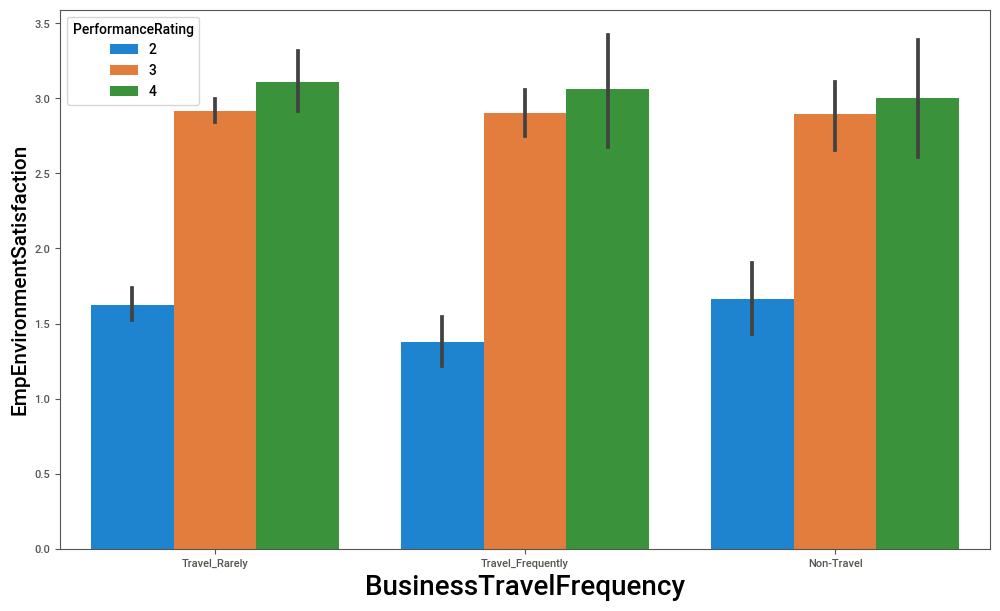

In [30]:
plt.figure(figsize=(12,7))
sns.barplot(x='BusinessTravelFrequency',y='EmpEnvironmentSatisfaction',hue=data.PerformanceRating,data=data)
plt.xlabel('BusinessTravelFrequency',fontsize=20)
plt.ylabel('EmpEnvironmentSatisfaction',fontsize=15)
plt.show()

* If the employee enviorment satisfaction is high that time performance rating is 3 & 4 in all buisness travel frequency.
* Low employee enviorment satisfaction has 2 performance rating in all buisness travel frequency.

**Relationship between Attrition & YearsWithCurrManager with respect to target feature**

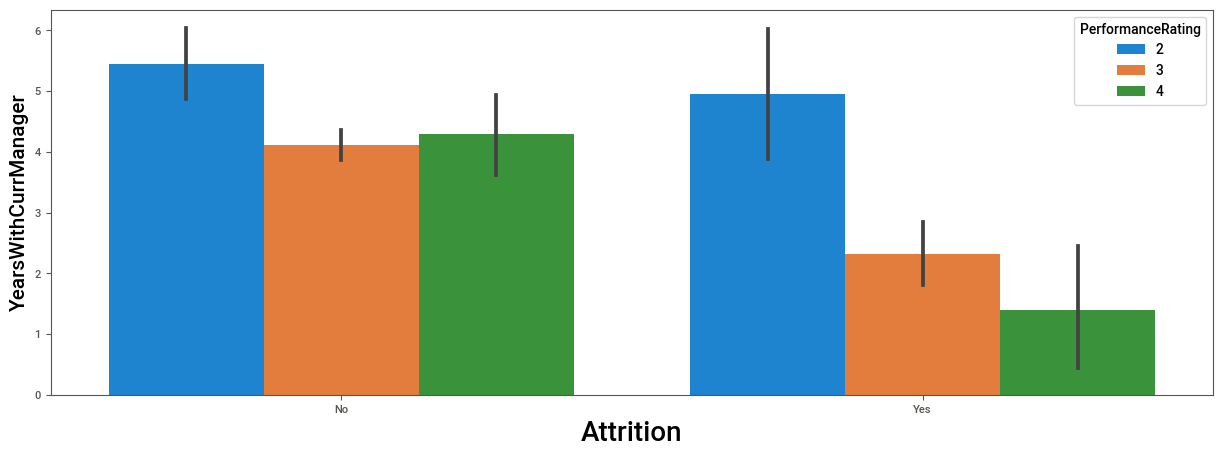

In [31]:
plt.figure(figsize=(15,5))
sns.barplot(x='Attrition',y='YearsWithCurrManager',hue=data.PerformanceRating,data=data)
plt.xlabel('Attrition',fontsize=20)
plt.ylabel('YearsWithCurrManager',fontsize=15)
plt.show()

**Insights:**
* If the employee current manager year increases, that time performance rating is 2 and 50-50% chances of employee to leave the company.
* Those with employee perfomance rating 4 and as the current manager year increases, that time most of the employee won't leave the company.

**Relationship between EducationBackground & ExperienceYearsInCurrentRole with respect to target feature**

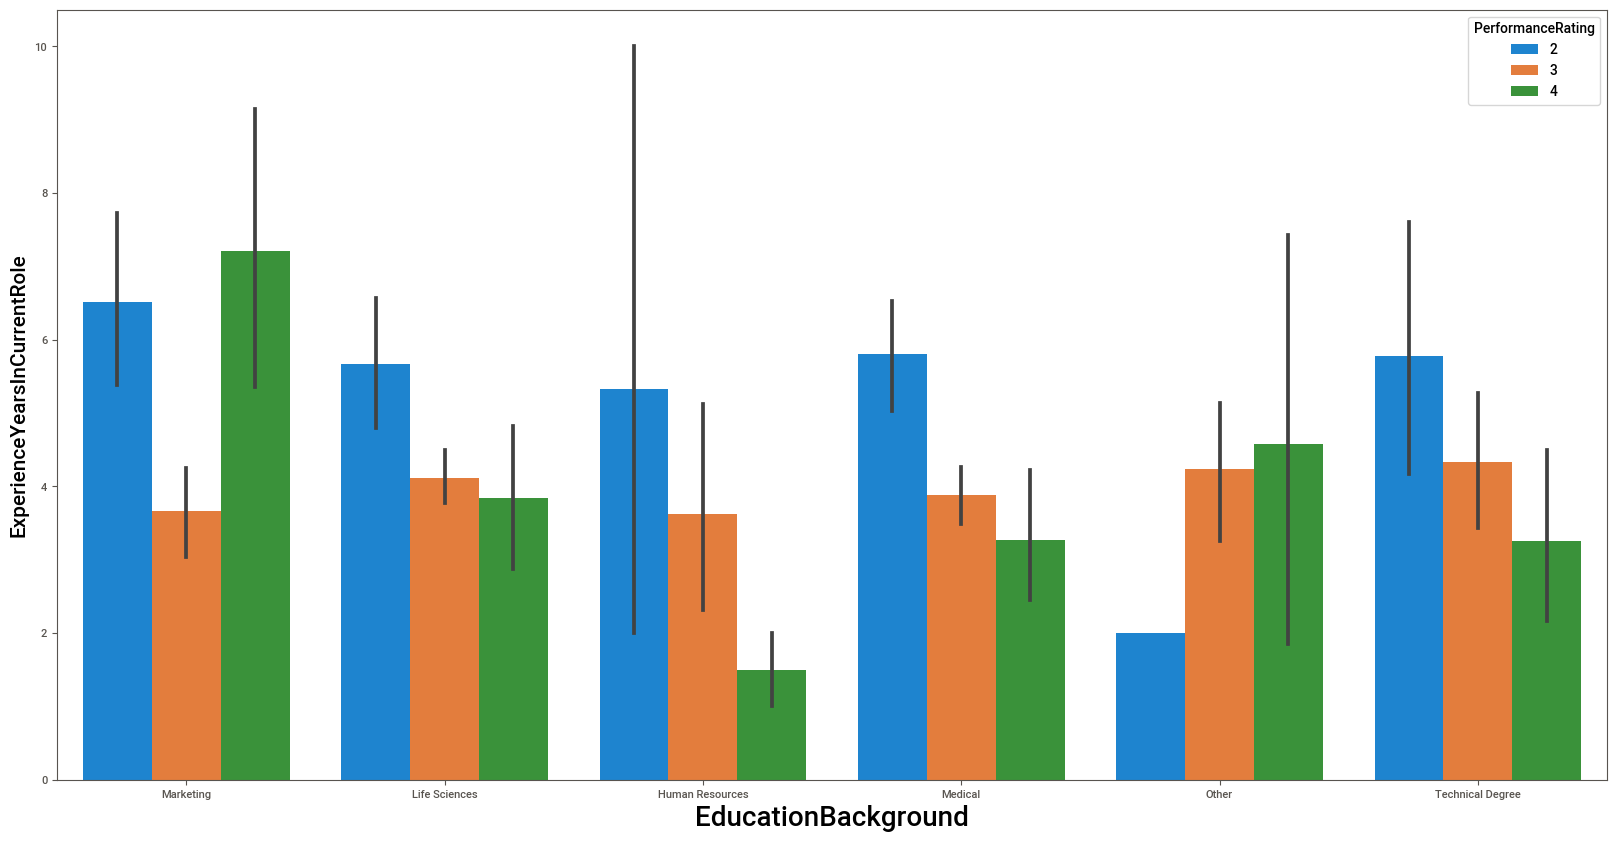

In [32]:
plt.figure(figsize=(20,10))
sns.barplot(x='EducationBackground',y='ExperienceYearsInCurrentRole',hue=data.PerformanceRating,data=data)
plt.xlabel('EducationBackground',fontsize=20)
plt.ylabel('ExperienceYearsInCurrentRole',fontsize=15)
plt.show()

* If the current role experience increases, the employees with the marketing education background has performance rating as 4 most of the time.
* In all education background with current role experiance is more than 5, the performance rating of employee is 2.
* Life sciences, Medical, others , and technical degree education backgrounds, the employee has less than 4 year of experience in current role and the performance rating is 3 & 4.

**Relationship between OverTime & DistanceFromHome with respect to target feature**

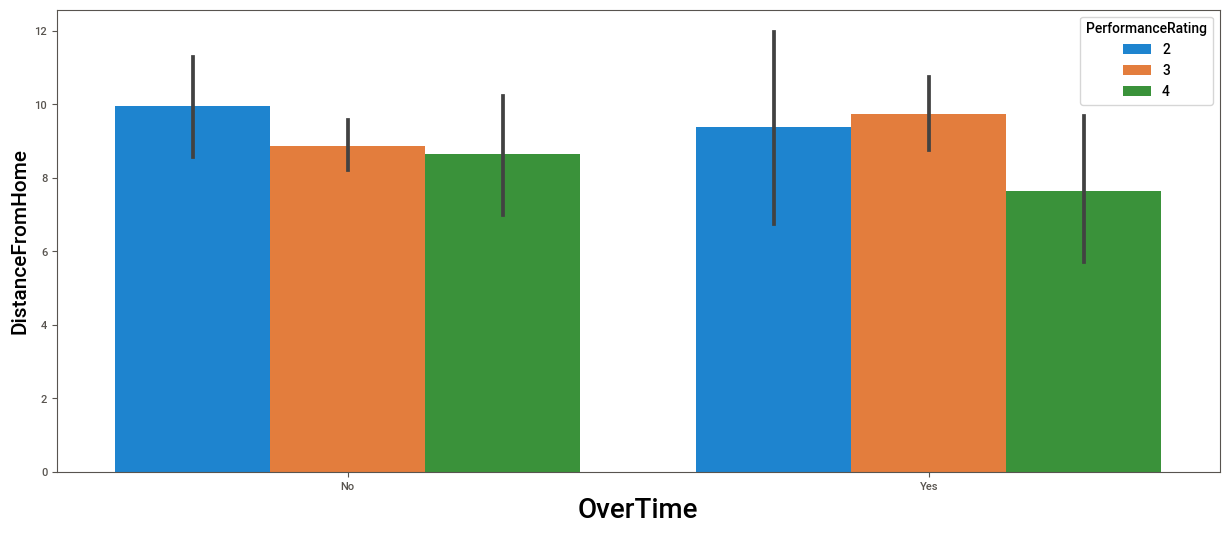

In [33]:
plt.figure(figsize=(15,6))
sns.barplot(x='OverTime',y='DistanceFromHome',hue=data.PerformanceRating,data=data)
plt.xlabel('OverTime',fontsize=20)
plt.ylabel('DistanceFromHome',fontsize=15)
plt.show()

* If the distance from home increases, the performance rating is almost constant with employee doing overtime as well as not doing overtime.

**Relationship between EmpDepartment & TrainingTimesLastYear with respect to target feature**

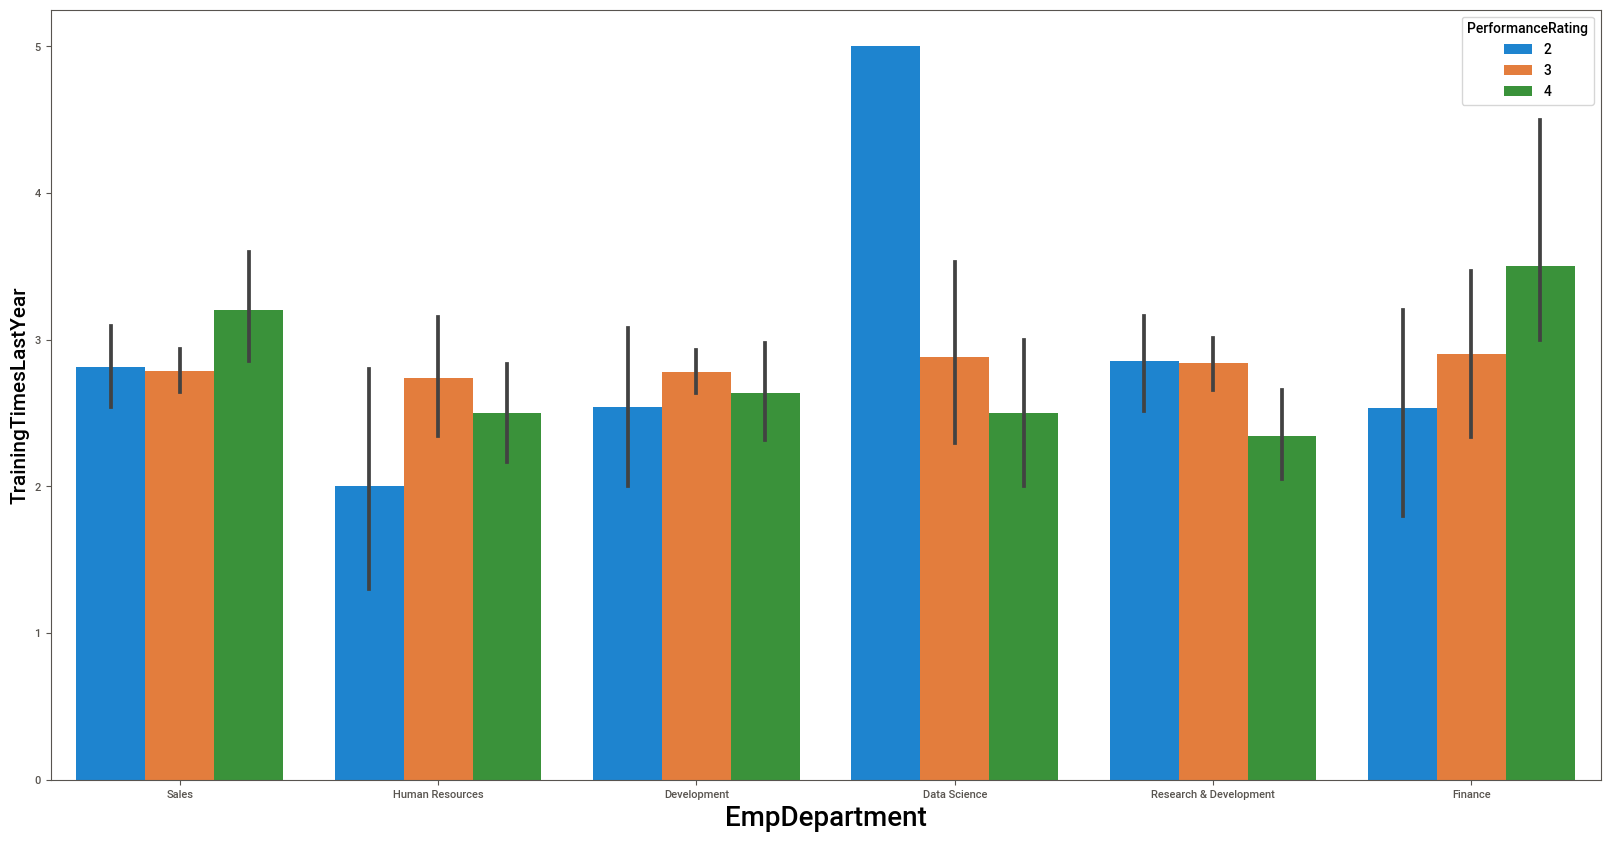

In [34]:
plt.figure(figsize=(20,10))
sns.barplot(x='EmpDepartment',y='TrainingTimesLastYear',hue=data.PerformanceRating,data=data)
plt.xlabel('EmpDepartment',fontsize=20)
plt.ylabel('TrainingTimesLastYear',fontsize=15)
plt.show()


* If the employee is from data science department and most training time is in last year, then the performance rating is 2 in most of the time.
* Other all employee department with less than 3 time training in last year then the performance rating is constant.

**Relationship between Attrition &  NumCompaniesWorked with respect to target feature**

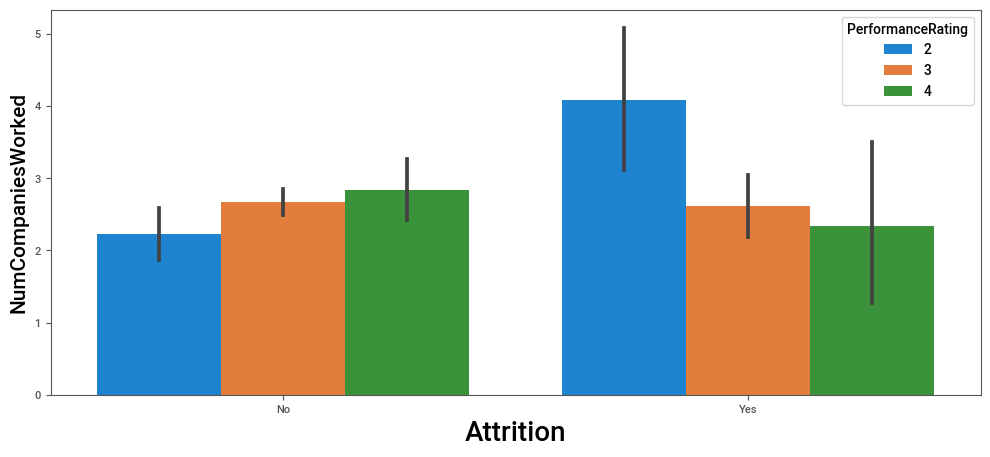

In [35]:
plt.figure(figsize=(12,5))
sns.barplot(x='Attrition',y='NumCompaniesWorked',hue=data.PerformanceRating,data=data)
plt.xlabel('Attrition',fontsize=20)
plt.ylabel('NumCompaniesWorked',fontsize=15)
plt.show()


* If number of companies worked increases, most of the employees leave the company and their performance rating is 2
* Those employees worked in less number of companies won't leave the company and their performance rating is constant.

### TOP 3 FACTOR AFFECTING TO THE EMPLOYEE PERFORMANCE

**Here from the visualisation part,we get the top 3 factor affecting the employee performance**
1. Emp Environment Satisfaction
2. Emp Last Salary Hike Percent
3. Emp Work Life Balance

# Department Wise Performances

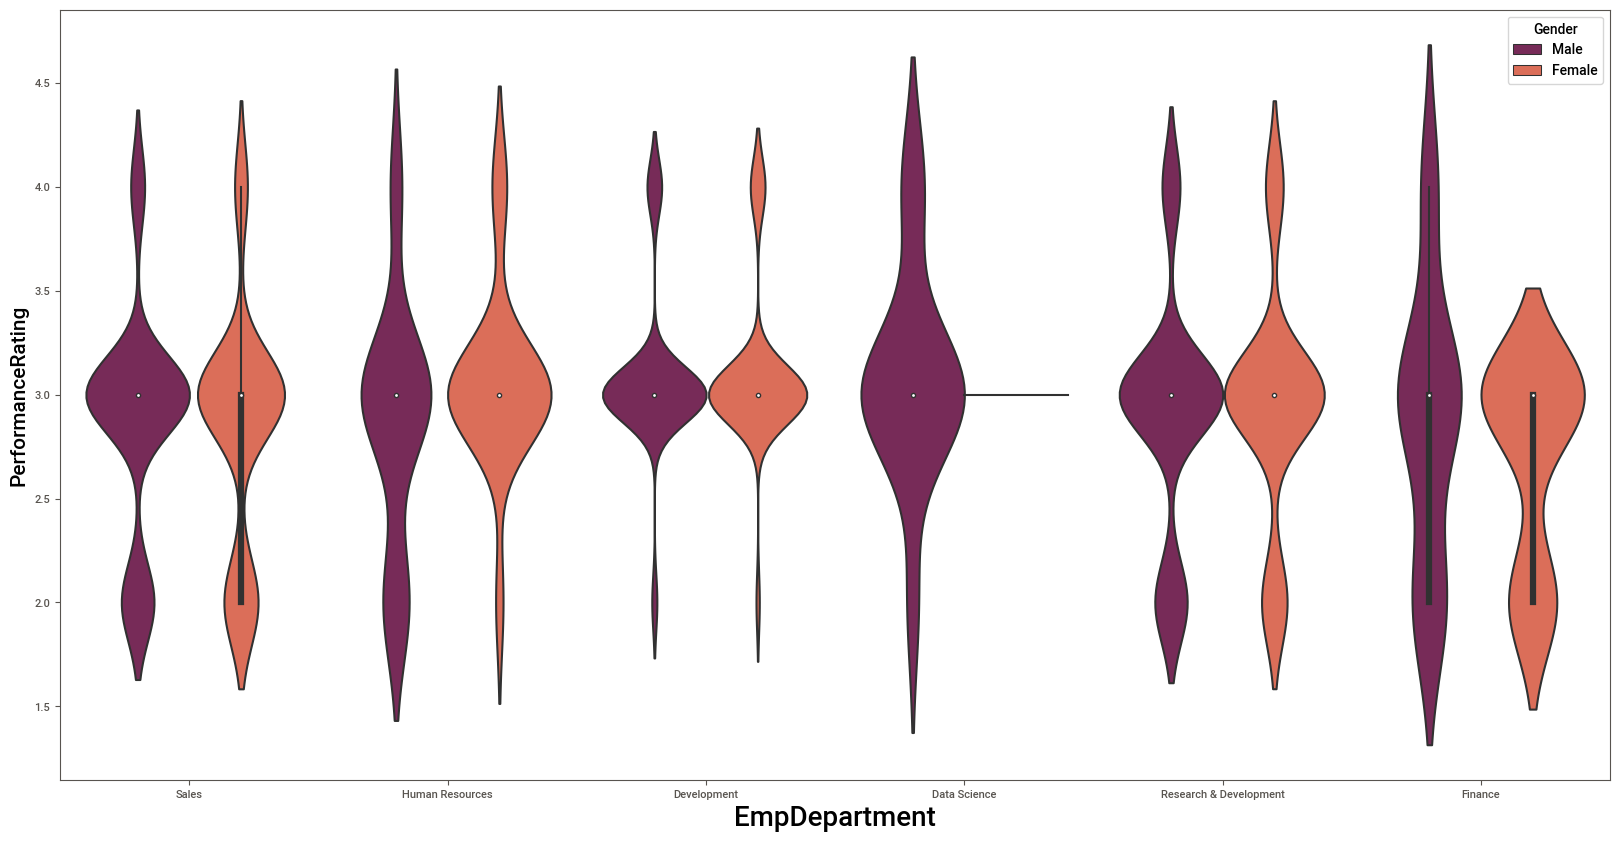

In [36]:
plt.figure(figsize=(20,10),facecolor='white')
sns.violinplot(x='EmpDepartment',y='PerformanceRating',hue=data.Gender,data=data,palette='rocket')
plt.xlabel('EmpDepartment',fontsize=20)
plt.ylabel('PerformanceRating',fontsize=15)
plt.show()

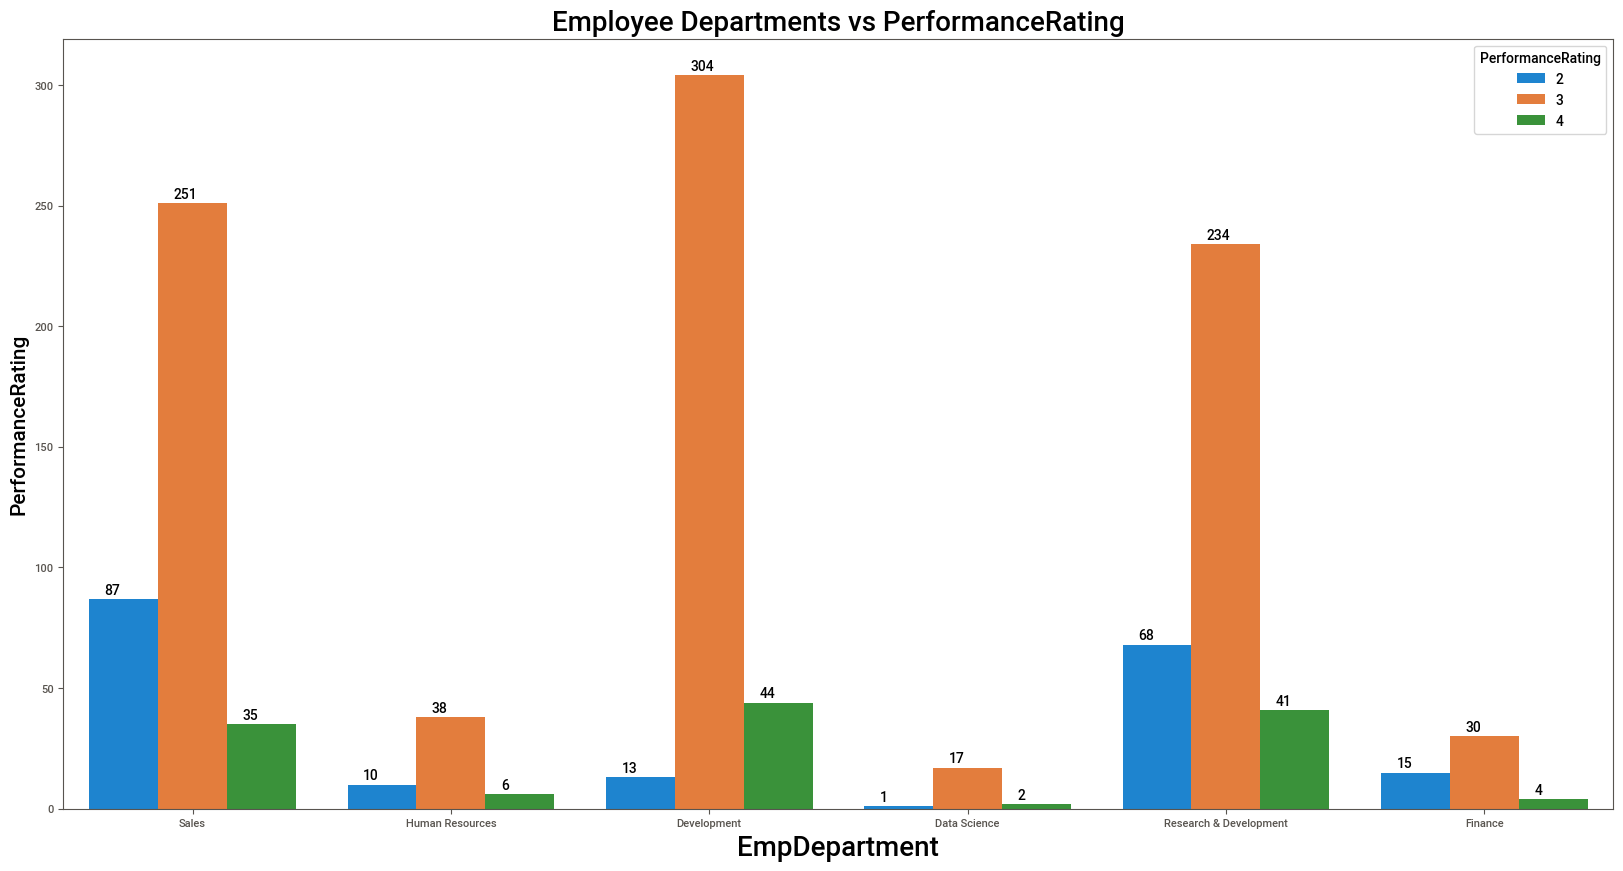

In [37]:
plt.figure(figsize=(20,10),facecolor='white')
ax = sns.countplot(x='EmpDepartment',hue=data.PerformanceRating,data=data)
for i in ax.patches:
    ax.annotate('{:.0f}'.format(i.get_height()), (i.get_x()+0.06, i.get_height()+2))
plt.title('Employee Departments vs PerformanceRating',fontsize=20)
plt.xlabel('EmpDepartment',fontsize=20)
plt.ylabel('PerformanceRating',fontsize=15)
plt.show()


**Insights:**

**Here, we can conclude that the Development department is showing High performance rating**

**Sales:** The Performace rating level 3 is more in the sales department. The male performance rating the little bit higher compared to female.

**Human Resources:** The majority of the employees lying under the level 3 performance . The older people are performing low in this department. The female employees in HR department doing really well in their performance.

**Development:** The maximum number of employees are level 3 performers. Employees of all age are performing at the level of 3 only. The gender-based performance is nearly same for both.

**Data Science:** The highest average of level 3 performance is in data science department. Data science is the only department where less number of level 2 performers. The overall performance is higher compared to all departments. Male employees are doing good in this department.

**Research & Development:** The age factor is not deviating from the level of performance here where different employees with different age are there in every level of performance. The R&D has the good female employees in their performance.

**Finance:** The finance department performance is exponentially decreasing when age increases. The male employees are doing good. The experience factor is inversely relating to the performance level.

In [38]:
# PERCENT COUNT IN EMPLOYEE DEPARTMENT WITH PERFORMANCE RATING
percent = pd.crosstab(data["PerformanceRating"], data["EmpDepartment"], margins=True,normalize=True)
round(percent.multiply(100),2)

EmpDepartment,Data Science,Development,Finance,Human Resources,Research & Development,Sales,All
PerformanceRating,,,,,,,
2,0.08,1.08,1.25,0.83,5.67,7.25,16.17
3,1.42,25.33,2.50,3.17,19.50,20.92,72.83
4,0.17,3.67,0.33,0.50,3.42,2.92,11.00
All,1.67,30.08,4.08,4.50,28.58,31.08,100.00


#### CHECKING THE DISTRIBUTION OF CONTINUOUS FEATURE 

In [39]:
# Get the continuous features
data.select_dtypes('int64').head()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
0,32,10,3,4,55,3,2,4,1,12,4,10,2,2,10,7,0,8,3
1,47,14,4,4,42,3,2,1,2,12,4,20,2,3,7,7,1,7,3
2,40,5,4,4,48,2,3,1,5,21,3,20,2,3,18,13,1,12,4
3,41,10,4,2,73,2,5,4,3,15,2,23,2,2,21,6,12,6,3
4,60,16,4,1,84,3,2,1,8,14,4,10,1,3,2,2,2,2,3


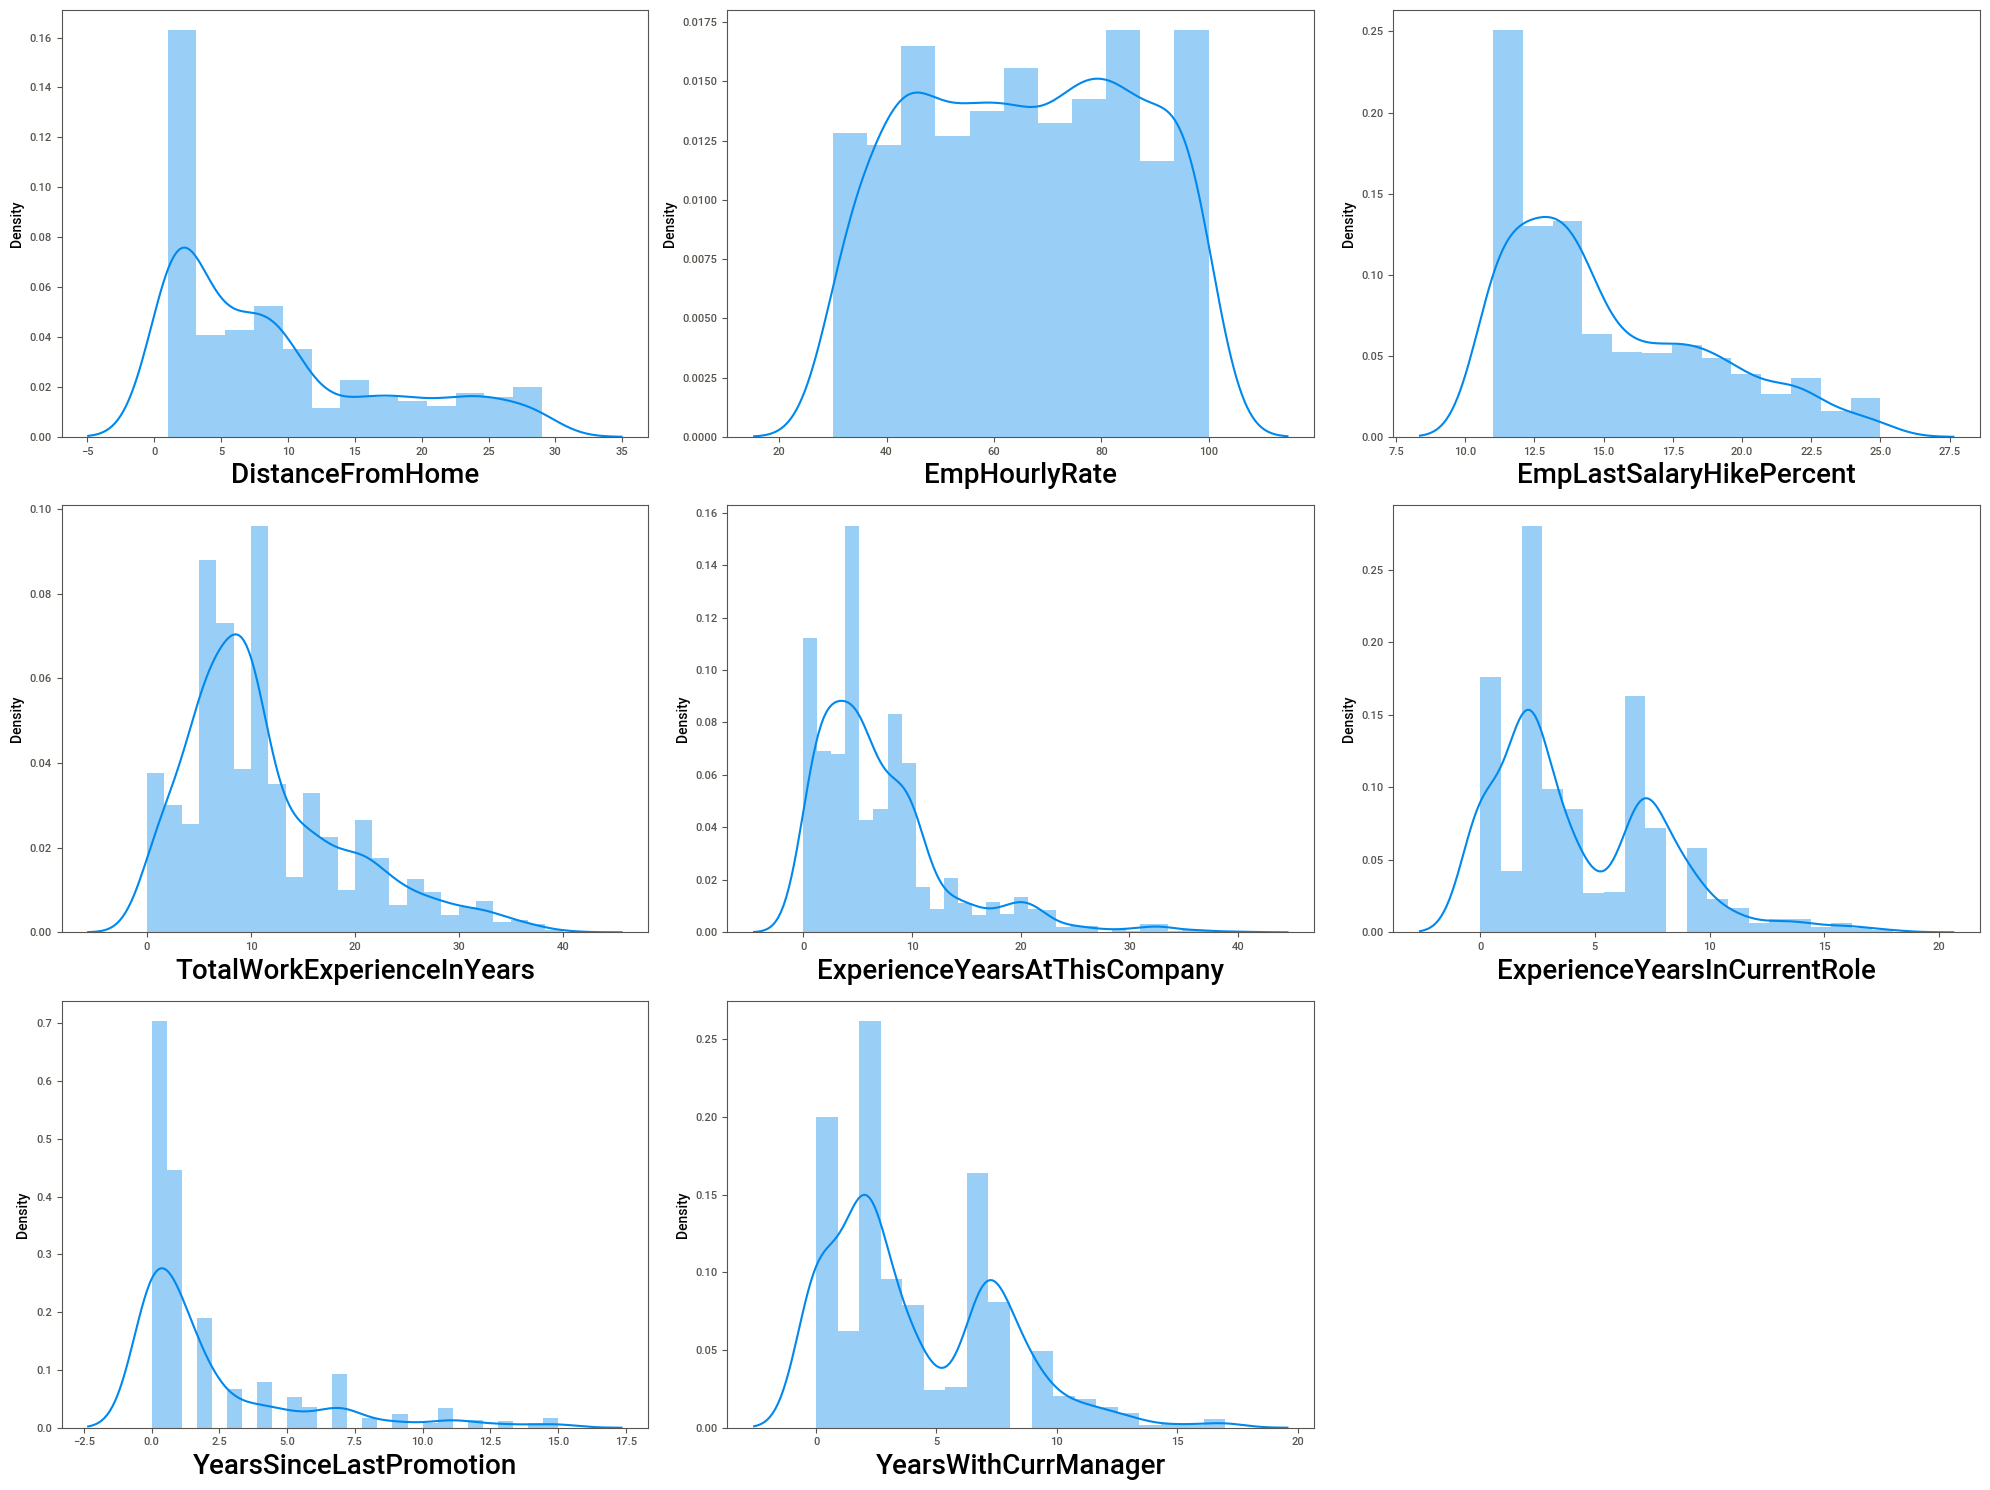

In [40]:
# Make a list of continuous feature in nature
continuous = data[['DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent','TotalWorkExperienceInYears',
                   'ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,15)) # defining canvas size
plotno = 1 # counter

for column in continuous: # iteration of columns / acessing the columns from count 
    if plotno<=8:    # set the limit
        plt.subplot(3,3,plotno) # # plotting 7 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.distplot(x=continuous[column]) # Plotting dist plots 
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction


#### Checking Skewness & Kurtosis

In [41]:
print('1.Distance From Home Feature Skewness:',data.DistanceFromHome.skew())
print('2.Employee Hourly Rate Feature Skewness:',data.EmpHourlyRate.skew())
print('3.Employee Last Salary Hike Percent Feature Skewness:',data.EmpLastSalaryHikePercent.skew())
print('4.Total Work Experiance In Year Feature Skewness:',data.TotalWorkExperienceInYears.skew())
print('5.Experiance Year At This Company Feature Skewness:',data.ExperienceYearsAtThisCompany.skew())
print('6.Experiance Year In Current Role Feature Skewness:',data.ExperienceYearsInCurrentRole.skew())
print('7.Year Since Last Promotion Feature Skewness:',data.YearsSinceLastPromotion.skew())
print('8.Years With Current Manager Feature Skewness:',data.YearsWithCurrManager.skew())


1.Distance From Home Feature Skewness: 0.9629561160828001
2.Employee Hourly Rate Feature Skewness: -0.035164888157941436
3.Employee Last Salary Hike Percent Feature Skewness: 0.8086536332261228
4.Total Work Experiance In Year Feature Skewness: 1.0868618597364565
5.Experiance Year At This Company Feature Skewness: 1.789054979919473
6.Experiance Year In Current Role Feature Skewness: 0.8881586703270758
7.Year Since Last Promotion Feature Skewness: 1.9749315589155791
8.Years With Current Manager Feature Skewness: 0.8131582957766446


In [42]:
print('1.Distance From Home Feature kurtosis:',data.DistanceFromHome.kurtosis())
print('2.Employee Hourly Rate Feature kurtosis:',data.EmpHourlyRate.kurtosis())
print('3.Employee Last Salary Hike Percent Feature kurtosis:',data.EmpLastSalaryHikePercent.kurtosis())
print('4.Total Work Experiance In Year Feature kurtosis:',data.TotalWorkExperienceInYears.kurtosis())
print('5.Experiance Year At This Company Feature kurtosis:',data.ExperienceYearsAtThisCompany.kurtosis())
print('6.Experiance Year In Current Role Feature kurtosis:',data.ExperienceYearsInCurrentRole.kurtosis())
print('7.Year Since Last Promotion Feature kurtosis:',data.YearsSinceLastPromotion.kurtosis())
print('8.Years With Current Manager Feature kurtosis:',data.YearsWithCurrManager.kurtosis())


1.Distance From Home Feature kurtosis: -0.24201677636189256
2.Employee Hourly Rate Feature kurtosis: -1.1868905128360532
3.Employee Last Salary Hike Percent Feature kurtosis: -0.29974077544117517
4.Total Work Experiance In Year Feature kurtosis: 0.8056333333819827
5.Experiance Year At This Company Feature kurtosis: 4.057959404441291
6.Experiance Year In Current Role Feature kurtosis: 0.4380286874251209
7.Year Since Last Promotion Feature kurtosis: 3.5390800793468817
8.Years With Current Manager Feature kurtosis: 0.14820164456972984


* From above all features, Year Since Last Promotion have skewness.So we need to do feature transformation in data preprocessing.
* From above all feature, experiance year at this company & Year Since Last Promotion have kutosis so we need to do feature transformation in data preprocessing

# Data Preprocessing

In [43]:
data.isnull().sum()

Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

* No missing value present in the data.

# Check for duplicates

In [44]:
data.duplicated().sum()

0

* No duplicates present in the data.

# Check for Outliers

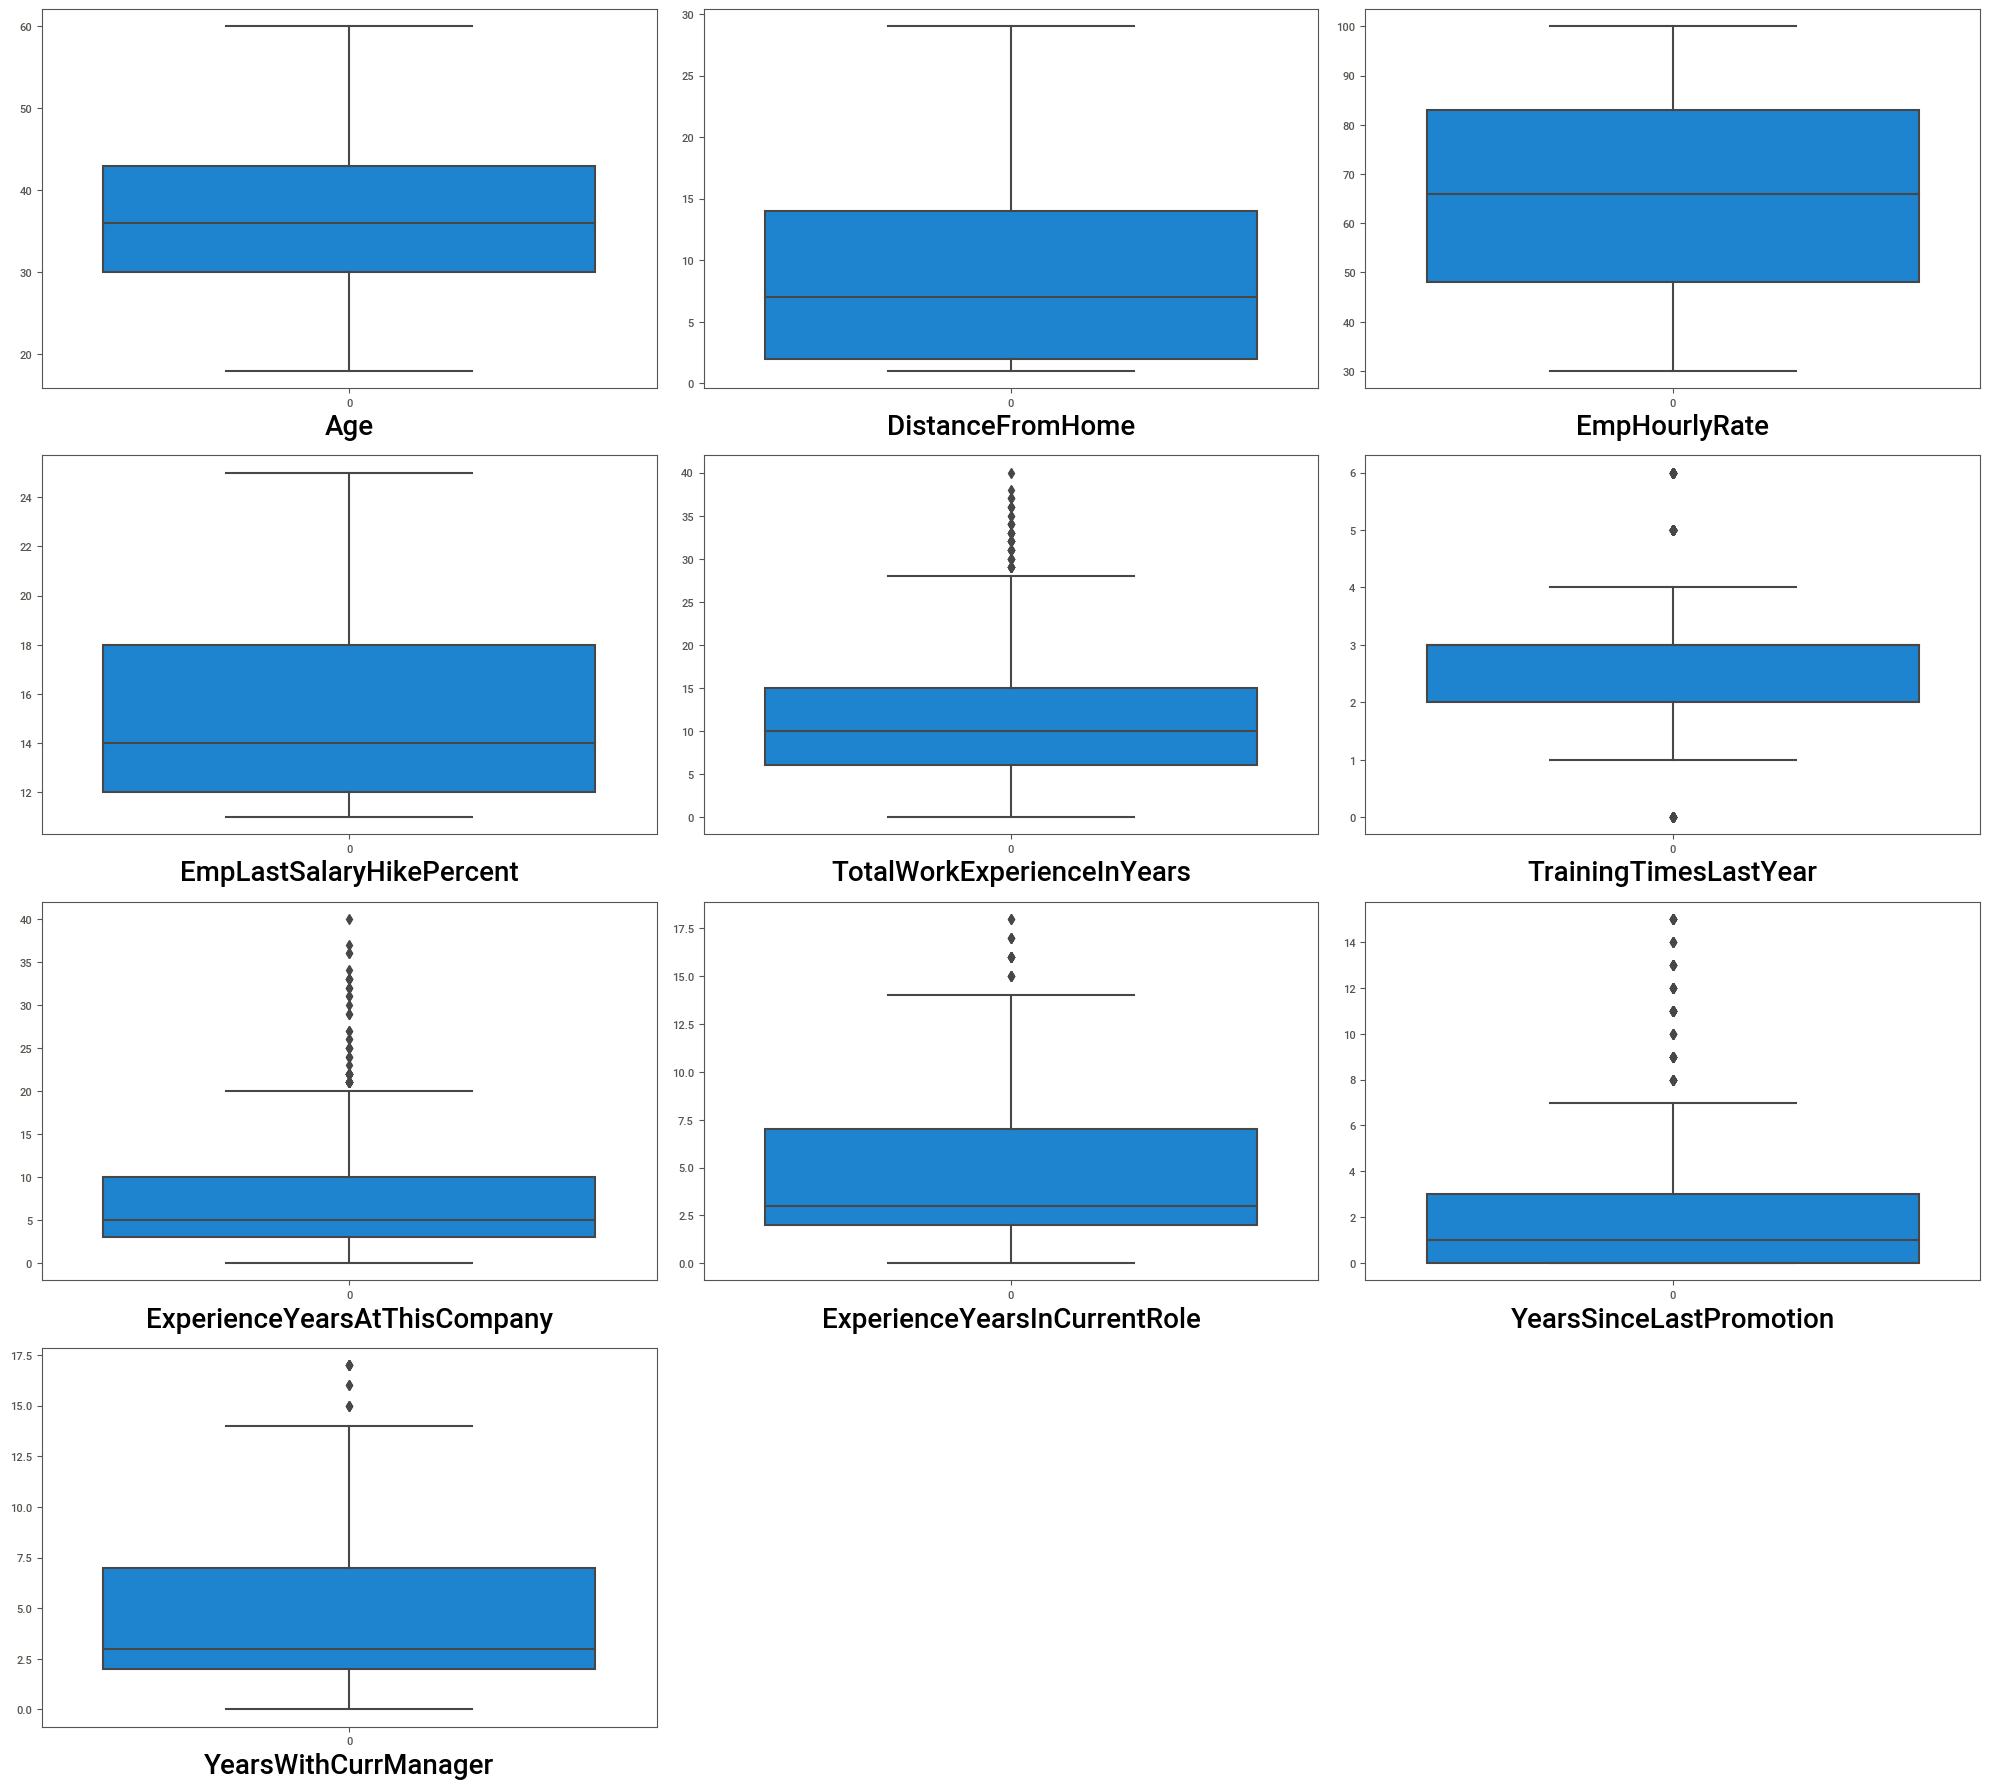

In [45]:
outliers = data[['Age','DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent',
                   'TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
                   'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,18)) # defining canvas size
plotno = 1 # counter

for column in outliers: # iteration of columns / acessing the columns from count 
    if plotno<=12:    # set the limit
        plt.subplot(4,3,plotno) # # plotting 7 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.boxplot(outliers[column]) # Plotting box plots to detect the outlier
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction


* Here we used inter quartile range to impute the outlier, because the data is not normally distributed.

#### 1. Total Work Experience in years

In [46]:
# We use iqr range because some data is skewed
iqr = stats.iqr(data['TotalWorkExperienceInYears'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first and third quantile
Q1 = data['TotalWorkExperienceInYears'].quantile(0.25)
Q3 = data['TotalWorkExperienceInYears'].quantile(0.75)

# Getting max and min limit
min_limit = Q1-1.5*iqr
print("Minimum limit:",min_limit)

max_limit= Q3+1.5*iqr
print("Maximum limit:",max_limit)

IQR: 9.0
Minimum limit: -7.5
Maximum limit: 28.5


In [47]:
# Impute outlier
data.loc[data['TotalWorkExperienceInYears'] > max_limit,'TotalWorkExperienceInYears']=data['TotalWorkExperienceInYears'].median()

In [48]:
# Impute outlier
data.loc[data['TotalWorkExperienceInYears'] > max_limit,'TotalWorkExperienceInYears']=data['TotalWorkExperienceInYears'].median()

#### 2. Training Times Last Year

In [49]:
# We use iqr range because some data is skewed
iqr = stats.iqr(data['TrainingTimesLastYear'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = data['TrainingTimesLastYear'].quantile(0.25)
Q3 = data['TrainingTimesLastYear'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 1.0
Minimum limit: 0.5
Maximum Limit: 4.5


In [50]:
# Impute outlier in max & minmum limit
data.loc[data['TrainingTimesLastYear'] < min_limit,'TrainingTimesLastYear']=data['TrainingTimesLastYear'].median()
data.loc[data['TrainingTimesLastYear'] > max_limit,'TrainingTimesLastYear']=data['TrainingTimesLastYear'].median()

In [51]:
# Filtering the min limit
data.loc[data['TrainingTimesLastYear'] < min_limit]

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


In [52]:
# Filtering the max limit
data.loc[data['TrainingTimesLastYear'] > max_limit]

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


#### 3. Experience Years At This Company

In [53]:
# Use iqr range because some skewed in data
iqr = stats.iqr(data['ExperienceYearsAtThisCompany'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = data['ExperienceYearsAtThisCompany'].quantile(0.25)
Q3 = data['ExperienceYearsAtThisCompany'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 7.0
Minimum limit: -7.5
Maximum Limit: 20.5


In [54]:
# Impute outlier
data.loc[data['ExperienceYearsAtThisCompany'] > max_limit,'ExperienceYearsAtThisCompany']=data['ExperienceYearsAtThisCompany'].median()

In [55]:
# Filtering the data
data.loc[data['ExperienceYearsAtThisCompany'] > max_limit]

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


#### 4.Experience Years In Current Role

In [56]:
# Use iqr range because some skewed in data
iqr = stats.iqr(data['ExperienceYearsInCurrentRole'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = data['ExperienceYearsInCurrentRole'].quantile(0.25)
Q3 = data['ExperienceYearsInCurrentRole'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 5.0
Minimum limit: -5.5
Maximum Limit: 14.5


In [57]:
# Impute the outlier
data.loc[data['ExperienceYearsInCurrentRole'] > max_limit,'ExperienceYearsInCurrentRole'] = data['ExperienceYearsInCurrentRole'].median()

In [58]:
# Filtering the data
data.loc[data['ExperienceYearsInCurrentRole'] > max_limit]

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


#### 5.Years Since Last Promotion

In [59]:
# use iqr because some skewed in data
iqr = stats.iqr(data['YearsSinceLastPromotion'],interpolation='midpoint')
print("IQR:",iqr)

# Get first and third quantile
Q1 = data['YearsSinceLastPromotion'].quantile(0.25)
Q3 = data['YearsSinceLastPromotion'].quantile(0.75)

# Get manimum and maximum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 +1.5*iqr
print("Maximum limit",max_limit)

IQR: 3.0
Minimum limit: -4.5
Maximum limit 7.5


In [60]:
# impute outlier
data.loc[data['YearsSinceLastPromotion'] > max_limit,'YearsSinceLastPromotion']=data['YearsSinceLastPromotion'].median()

In [61]:
# Filtering data
data.loc[data['YearsSinceLastPromotion'] > max_limit]

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


#### 6.Years With Current Manager

In [62]:
# use iqr because some skewed in data
iqr = stats.iqr(data['YearsWithCurrManager'],interpolation='midpoint')
print("IQR:",iqr)

# Get first and third quantile
Q1 = data['YearsWithCurrManager'].quantile(0.25)
Q3 = data['YearsWithCurrManager'].quantile(0.75)

# Get manimum and maximum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 +1.5*iqr
print("Maximum limit",max_limit)

IQR: 5.0
Minimum limit: -5.5
Maximum limit 14.5


In [63]:
# impute outlier
data.loc[data['YearsWithCurrManager'] > max_limit,'YearsWithCurrManager']=data['YearsWithCurrManager'].median()

In [64]:
# Filtering the data
data.loc[data['YearsWithCurrManager'] >max_limit]

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


#### CHECKING OUTLIER AFTER IMPUTATION

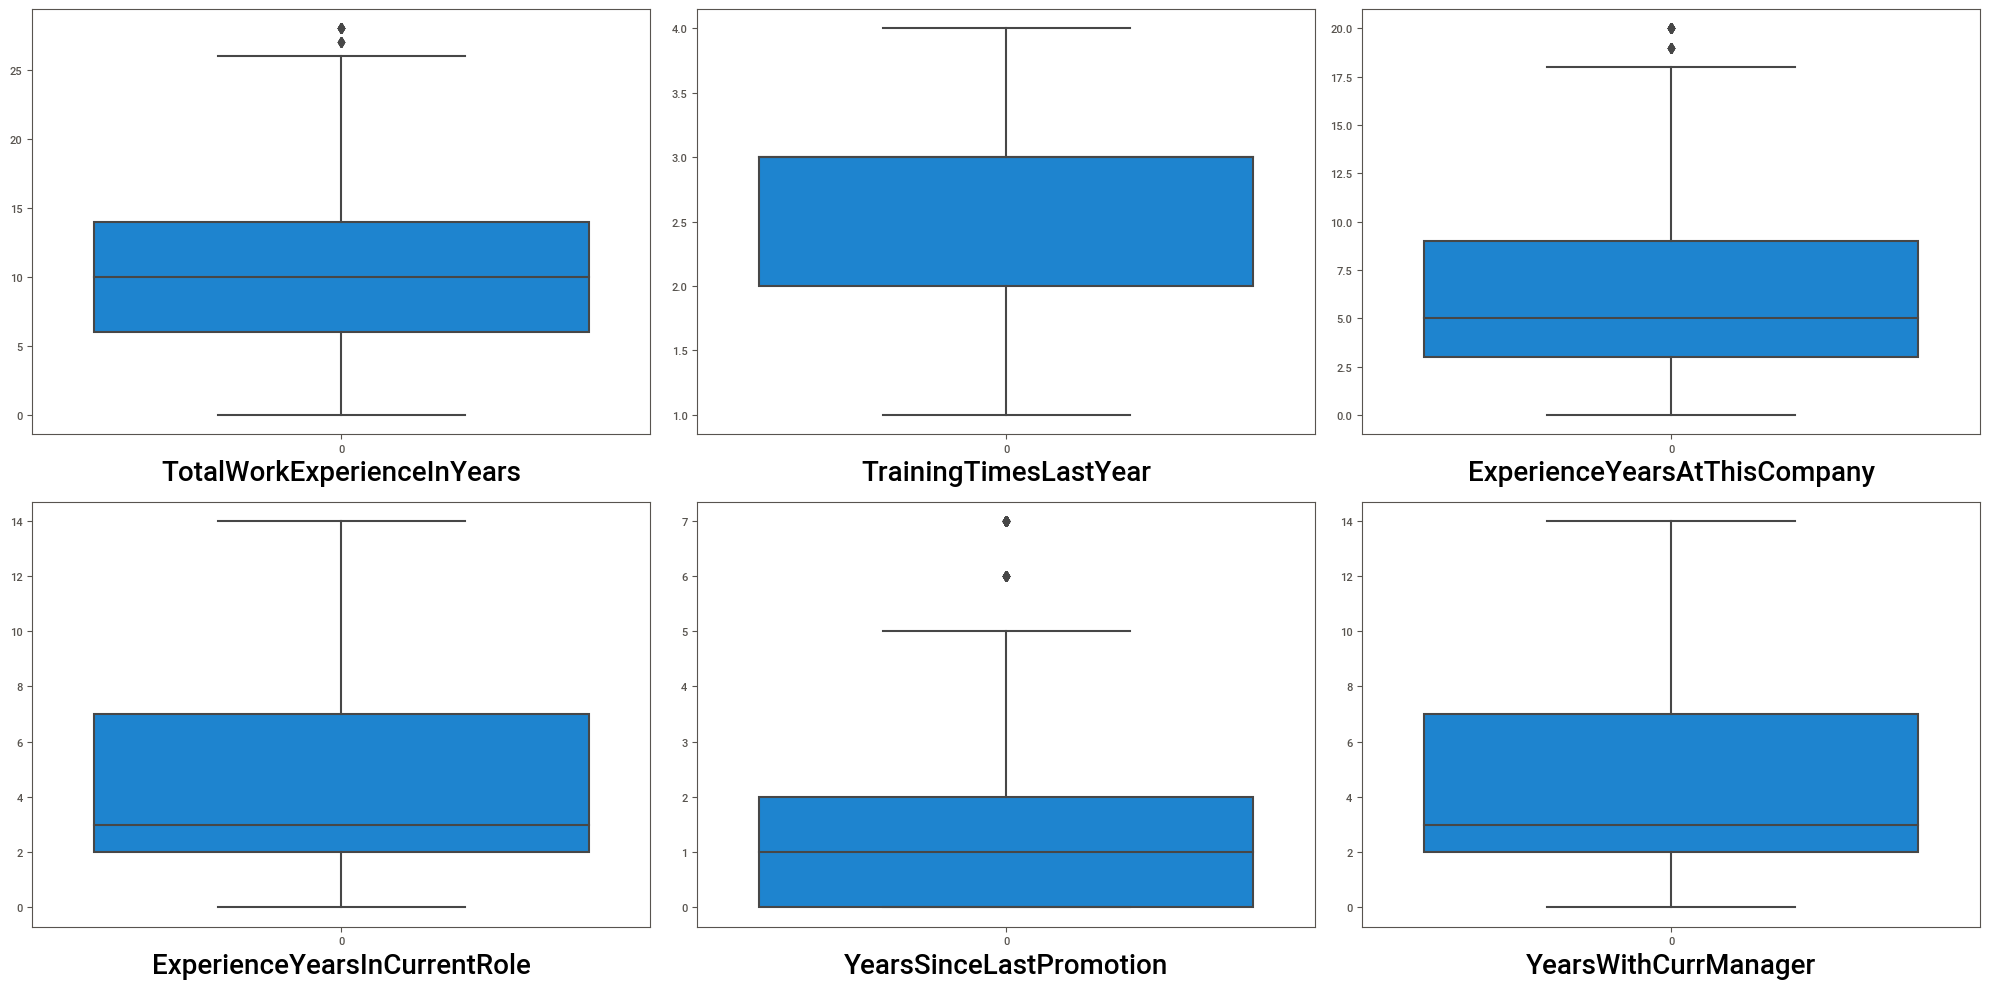

In [65]:
out = data[['TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
            'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,10)) # defining canvas size
plotno = 1 # counter

for column in out: # iteration of columns / acessing the columns from count 
    if plotno<=7:    # set the limit
        plt.subplot(2,3,plotno) # # plotting 7 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.boxplot(out[column]) # Plotting box plots to detect the outlier
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction


**Insights:**
* Outlier impute sucessfully, but in some features box plot showing outlier,since we cannot impute this outlier.

#### FEATURE TRANSFORMATION

* From the last EDA part, we get the yearsince last promotion feature have some skewness in data, so we are going to use square root transformation.

In [66]:
data['square_YearsSinceLastPromotion'] = data.YearsSinceLastPromotion**(1/2)

## Scaling the Data

In [67]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()  #Create Object

data[['Age','DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent','TotalWorkExperienceInYears',
      'TrainingTimesLastYear','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsWithCurrManager',
      'YearsSinceLastPromotion']]=scalar.fit_transform(data[['Age','DistanceFromHome','EmpHourlyRate',
      'EmpLastSalaryHikePercent','TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
      'ExperienceYearsInCurrentRole','YearsWithCurrManager','YearsSinceLastPromotion']])

In [68]:
data.head(10)

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating,square_YearsSinceLastPromotion
0,-0.541458,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,0.102061,3,4,-0.543569,3,2,4,1,No,-0.889111,4,-0.058535,-0.879579,2,0.868276,0.864098,-0.756553,1.202103,No,3,0.000000
1,1.109888,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,0.591464,4,4,-1.187042,3,2,1,2,No,-0.889111,4,1.512870,-0.879579,3,0.200371,0.864098,-0.234492,0.902825,No,3,1.000000
2,0.339260,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,-0.509693,4,4,-0.890055,2,3,1,5,Yes,1.594054,3,1.512870,-0.879579,3,2.649355,2.661702,-0.234492,2.399219,No,4,1.000000
3,0.449349,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,0.102061,4,2,0.347393,2,5,4,3,No,-0.061389,2,1.984292,-0.879579,2,-0.244898,0.564498,-0.234492,0.603546,No,3,1.000000
4,2.541054,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,0.836165,4,1,0.891870,3,2,1,8,No,-0.337297,4,-0.058535,-2.303999,3,-0.912803,-0.633905,0.287569,-0.593570,No,3,1.414214
5,-1.091906,Male,Life Sciences,Divorced,Development,Developer,Travel_Frequently,0.102061,2,4,-1.682021,3,3,1,1,No,1.594054,3,-0.215675,1.969261,2,0.645641,0.864098,-0.234492,0.902825,No,4,1.000000
6,1.440157,Male,Marketing,Married,Sales,Sales Representative,Travel_Rarely,-0.142640,4,4,-0.593067,3,1,2,7,No,-0.061389,4,-1.001378,-0.879579,3,-0.912803,-0.633905,0.287569,-0.593570,No,3,1.414214
7,-0.981817,Female,Life Sciences,Single,Development,Developer,Travel_Rarely,-0.999095,2,1,0.050405,1,1,2,7,Yes,-0.613204,4,-0.058535,1.969261,3,0.200371,0.864098,0.809630,0.902825,Yes,3,1.732051
8,-0.101099,Female,Life Sciences,Married,Development,Developer,Non-Travel,-0.142640,3,1,-0.147586,4,3,1,9,No,-0.337297,1,-0.058535,-0.879579,3,0.423006,0.864098,-0.756553,0.304267,No,3,0.000000
9,0.119080,Female,Life Sciences,Single,Development,Developer,Travel_Rarely,-0.999095,3,3,0.743376,3,3,3,4,Yes,-0.337297,4,-0.058535,1.969261,4,-1.135438,-1.233106,-0.756553,-1.192127,No,3,0.000000


## Converting Categorical Data to Numerical

In [69]:
# Get all categorical feature list
list(data.select_dtypes('object'))

['Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'OverTime',
 'Attrition']

#### 1.Gender: 

In [70]:
# Get value counts of gender
data.Gender.value_counts()

Male      725
Female    475
Name: Gender, dtype: int64

In [71]:
# Use mannual encoding to map the labels
data.Gender = data.Gender.map({'Male':1,'Female':0})

* Map male with 1 and female with 0 

#### 2.Education Background

In [72]:
# Get value counts of Education Background
data.EducationBackground.value_counts()

Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: EducationBackground, dtype: int64

In [73]:
# Use frequency encoding
data.loc[data['EducationBackground']=='Life Sciences','EducationBackground']=5
data.loc[data['EducationBackground']=='Medical','EducationBackground']=4
data.loc[data['EducationBackground']=='Marketing','EducationBackground']=3
data.loc[data['EducationBackground']=='Technical Degree','EducationBackground']=2
data.loc[data['EducationBackground']=='Other','EducationBackground']=1
data.loc[data['EducationBackground']=='Human Resources','EducationBackground']=0

In [74]:
# Checking conversion happen or not
data.EducationBackground.value_counts()

5    492
4    384
3    137
2    100
1     66
0     21
Name: EducationBackground, dtype: int64

#### 3.Marital Status

In [75]:
# Get the value counts of marital status
data.MaritalStatus.value_counts()

Married     548
Single      384
Divorced    268
Name: MaritalStatus, dtype: int64

In [76]:
# Use mannual encoding
data.MaritalStatus = data.MaritalStatus.map({'Married':2,'Single':1,'Divorced':0})

In [77]:
# Check conversion happen or not
data.MaritalStatus.value_counts()

2    548
1    384
0    268
Name: MaritalStatus, dtype: int64

#### 4.Employee Department

In [78]:
# Get the value counts of employee department 
data.EmpDepartment.value_counts()

Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: EmpDepartment, dtype: int64

In [79]:
# Use Frequency encoding
data.loc[data['EmpDepartment']=='Sales','EmpDepartment']=5
data.loc[data['EmpDepartment']=='Development','EmpDepartment']=4
data.loc[data['EmpDepartment']=='Research & Development','EmpDepartment']=3
data.loc[data['EmpDepartment']=='Human Resources','EmpDepartment']=2
data.loc[data['EmpDepartment']=='Finance','EmpDepartment']=1
data.loc[data['EmpDepartment']=='Data Science','EmpDepartment']=0

In [80]:
# Check conversion happen or not
data.EmpDepartment.value_counts()

5    373
4    361
3    343
2     54
1     49
0     20
Name: EmpDepartment, dtype: int64

#### 5.Employee Job Role

In [81]:
# Getting the value counts of EmpJobRole
data.EmpJobRole.value_counts()

Sales Executive              270
Developer                    236
Manager R&D                   94
Research Scientist            77
Sales Representative          69
Laboratory Technician         64
Senior Developer              52
Manager                       51
Finance Manager               49
Human Resources               45
Technical Lead                38
Manufacturing Director        33
Healthcare Representative     33
Data Scientist                20
Research Director             19
Business Analyst              16
Senior Manager R&D            15
Delivery Manager              12
Technical Architect            7
Name: EmpJobRole, dtype: int64

In [82]:
# Use frequency encoding because feature contain a lots of label
data.loc[data['EmpJobRole']=='Sales Executive','EmpJobRole']=18
data.loc[data['EmpJobRole']=='Developer','EmpJobRole']=17
data.loc[data['EmpJobRole']=='Manager R&D','EmpJobRole']=16
data.loc[data['EmpJobRole']=='Research Scientist','EmpJobRole']=15
data.loc[data['EmpJobRole']=='Sales Representative','EmpJobRole']=14
data.loc[data['EmpJobRole']=='Laboratory Technician','EmpJobRole']=13
data.loc[data['EmpJobRole']=='Senior Developer','EmpJobRole']=12
data.loc[data['EmpJobRole']=='Manager','EmpJobRole']=11
data.loc[data['EmpJobRole']=='Finance Manager','EmpJobRole']=10
data.loc[data['EmpJobRole']=='Human Resources','EmpJobRole']=9
data.loc[data['EmpJobRole']=='Technical Lead','EmpJobRole']=8
data.loc[data['EmpJobRole']=='Manufacturing Director','EmpJobRole']=7
data.loc[data['EmpJobRole']=='Healthcare Representative','EmpJobRole']=6
data.loc[data['EmpJobRole']=='Data Scientist','EmpJobRole']=5
data.loc[data['EmpJobRole']=='Research Director','EmpJobRole']=4
data.loc[data['EmpJobRole']=='Business Analyst','EmpJobRole']=3
data.loc[data['EmpJobRole']=='Senior Manager R&D','EmpJobRole']=2
data.loc[data['EmpJobRole']=='Delivery Manager','EmpJobRole']=1
data.loc[data['EmpJobRole']=='Technical Architect','EmpJobRole']=0

In [83]:
# Check conversion happen or not
data.EmpJobRole.value_counts()

18    270
17    236
16     94
15     77
14     69
13     64
12     52
11     51
10     49
9      45
8      38
7      33
6      33
5      20
4      19
3      16
2      15
1      12
0       7
Name: EmpJobRole, dtype: int64

#### 6.Business Travel Frequency:

In [84]:
# Get the value count of buisness travel frequency
data.BusinessTravelFrequency.value_counts()

Travel_Rarely        846
Travel_Frequently    222
Non-Travel           132
Name: BusinessTravelFrequency, dtype: int64

In [85]:
# Use mannual encoding Because feature contain minimum label
data.BusinessTravelFrequency = data.BusinessTravelFrequency.map({'Travel_Rarely':2,'Travel_Frequently':1,'Non-Travel':0})

In [86]:
# Check conversion happen or not
data.BusinessTravelFrequency.value_counts()

2    846
1    222
0    132
Name: BusinessTravelFrequency, dtype: int64

#### 7.Overtime:

In [87]:
# Get the value count of Overtime
data.OverTime.value_counts()

No     847
Yes    353
Name: OverTime, dtype: int64

In [88]:
# Use mannual Encoding
data.OverTime = data.OverTime.map({'No':1,'Yes':0})

In [89]:
# Check conversion happen or not
data.OverTime.value_counts()

1    847
0    353
Name: OverTime, dtype: int64

#### 8.Attrition

In [90]:
# Get the value counts of Attrition
data.Attrition.value_counts()

No     1022
Yes     178
Name: Attrition, dtype: int64

In [91]:
# Use Mannual encoding because feature contain less no of label
data.Attrition = data.Attrition.map({'No':1,'Yes':0})

In [92]:
# Check conversion happen or not
data.Attrition.value_counts()

1    1022
0     178
Name: Attrition, dtype: int64

In [93]:
# Check all data features 
data.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating,square_YearsSinceLastPromotion
0,-0.541458,1,3,1,5,18,2,0.102061,3,4,-0.543569,3,2,4,1,1,-0.889111,4,-0.058535,-0.879579,2,0.868276,0.864098,-0.756553,1.202103,1,3,0.000000
1,1.109888,1,3,1,5,18,2,0.591464,4,4,-1.187042,3,2,1,2,1,-0.889111,4,1.512870,-0.879579,3,0.200371,0.864098,-0.234492,0.902825,1,3,1.000000
2,0.339260,1,5,2,5,18,1,-0.509693,4,4,-0.890055,2,3,1,5,0,1.594054,3,1.512870,-0.879579,3,2.649355,2.661702,-0.234492,2.399219,1,4,1.000000
3,0.449349,1,0,0,2,11,2,0.102061,4,2,0.347393,2,5,4,3,1,-0.061389,2,1.984292,-0.879579,2,-0.244898,0.564498,-0.234492,0.603546,1,3,1.000000
4,2.541054,1,3,1,5,18,2,0.836165,4,1,0.891870,3,2,1,8,1,-0.337297,4,-0.058535,-2.303999,3,-0.912803,-0.633905,0.287569,-0.593570,1,3,1.414214


## Feature Engineering

### Checking Correlation

In [94]:
data.corr()

,Age,Gender,MaritalStatus,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating,square_YearsSinceLastPromotion
Age,1.000000,-0.040107,0.028983,0.040579,0.020937,0.207313,0.013814,0.062867,0.027216,0.509139,-0.002436,0.284408,-0.051910,-0.006105,0.049749,0.559662,0.025680,-0.019563,0.176752,0.185951,0.121078,0.187042,0.189317,-0.040164,0.137444
Gender,-0.040107,1.000000,-0.013286,-0.043608,-0.001507,-0.022960,0.000033,0.002218,0.010949,-0.050685,0.024680,-0.036675,0.038410,-0.005319,0.030707,-0.060534,-0.033224,0.015793,-0.053683,-0.023985,-0.028153,-0.039737,-0.035758,-0.001780,-0.021020
MaritalStatus,0.028983,-0.013286,1.000000,0.087524,0.015542,0.003130,-0.042945,0.010802,0.004670,0.006755,0.028628,-0.047466,0.021658,0.010378,-0.052917,-0.012136,-0.029866,-0.002060,0.027914,0.018488,0.065585,-0.000105,0.028260,-0.039682,0.059525
BusinessTravelFrequency,0.040579,-0.043608,0.087524,1.000000,-0.020935,0.002064,0.012267,0.025400,0.016652,0.036360,-0.031236,0.021476,-0.032229,-0.041946,-0.032705,0.032795,0.014170,-0.040969,-0.017051,-0.010188,0.022616,-0.051463,-0.007217,-0.031025,0.014229
DistanceFromHome,0.020937,-0.001507,0.015542,-0.020935,1.000000,0.045856,-0.017719,0.013730,0.003231,0.017270,-0.003036,-0.021411,-0.024940,0.044974,-0.009509,0.035134,-0.041665,-0.044788,0.044539,0.025994,0.027552,0.014473,-0.063248,-0.046142,0.030388
EmpEducationLevel,0.207313,-0.022960,0.003130,0.002064,0.045856,1.000000,-0.037103,0.014095,0.027544,0.100734,0.000357,0.128674,0.021119,0.002358,-0.016690,0.119202,-0.004939,0.010276,0.073043,0.069838,0.041243,0.073803,0.049118,0.020529,0.029394
EmpEnvironmentSatisfaction,0.013814,0.000033,-0.042945,0.012267,-0.017719,-0.037103,1.000000,-0.049501,0.004865,-0.008272,-0.004319,0.017270,-0.064270,-0.047271,-0.010504,-0.042040,0.027839,-0.000262,0.006995,0.047522,0.012837,-0.007706,0.123490,0.395561,0.020749
EmpHourlyRate,0.062867,0.002218,0.010802,0.025400,0.013730,0.014095,-0.049501,1.000000,0.054741,-0.018606,-0.066417,0.040484,0.032636,-0.015934,0.008783,0.027614,0.017896,0.016189,-0.024692,-0.022571,-0.040896,0.007847,0.026313,-0.043116,-0.041262
EmpJobInvolvement,0.027216,0.010949,0.004670,0.016652,0.003231,0.027544,0.004865,0.054741,1.000000,-0.034349,-0.005501,0.018211,0.011069,-0.001742,0.018037,-0.006865,0.011478,-0.014129,0.021312,0.001871,0.035470,0.014336,0.153360,-0.010539,0.027119
EmpJobLevel,0.509139,-0.050685,0.006755,0.036360,0.017270,0.100734,-0.008272,-0.018606,-0.034349,1.000000,-0.011853,0.127477,-0.030012,-0.020975,0.002992,0.669056,-0.028961,0.049218,0.327858,0.341484,0.134603,0.365155,0.175763,-0.076632,0.164804


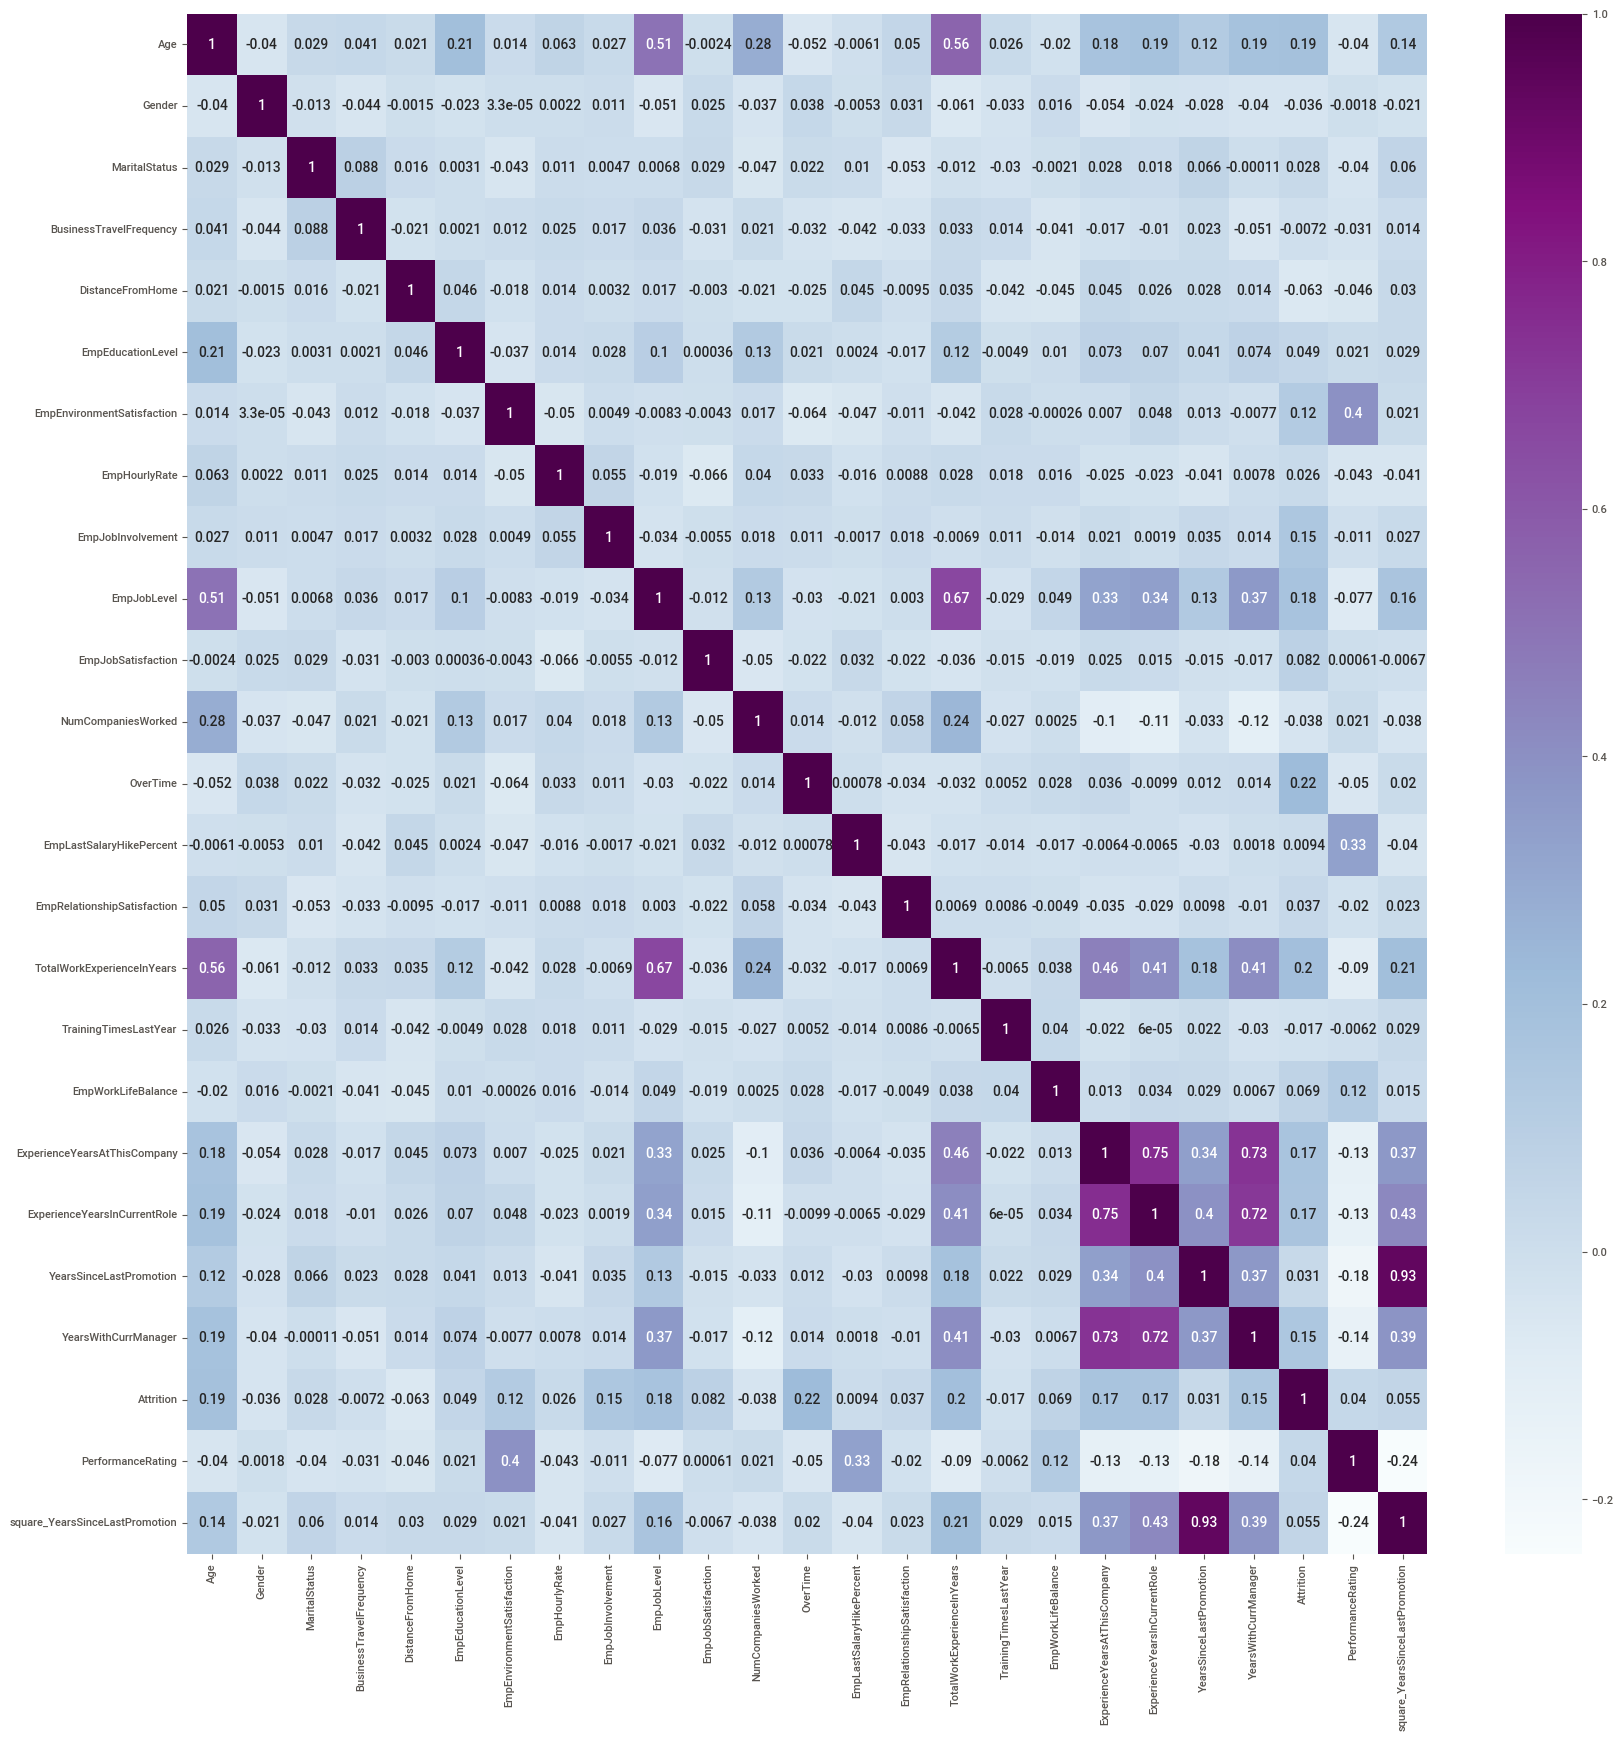

In [95]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,cmap='BuPu')
plt.show()

* Now we can say that there is no highly correlated feature is present.

## Split Data into x and y

In [96]:
x = data.drop(columns=['PerformanceRating']) #dropped perfomancerating because its target variable and empnumber becouse it has no effect in the data
y = data['PerformanceRating']

In [97]:
x.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,square_YearsSinceLastPromotion
0,-0.541458,1,3,1,5,18,2,0.102061,3,4,-0.543569,3,2,4,1,1,-0.889111,4,-0.058535,-0.879579,2,0.868276,0.864098,-0.756553,1.202103,1,0.000000
1,1.109888,1,3,1,5,18,2,0.591464,4,4,-1.187042,3,2,1,2,1,-0.889111,4,1.512870,-0.879579,3,0.200371,0.864098,-0.234492,0.902825,1,1.000000
2,0.339260,1,5,2,5,18,1,-0.509693,4,4,-0.890055,2,3,1,5,0,1.594054,3,1.512870,-0.879579,3,2.649355,2.661702,-0.234492,2.399219,1,1.000000
3,0.449349,1,0,0,2,11,2,0.102061,4,2,0.347393,2,5,4,3,1,-0.061389,2,1.984292,-0.879579,2,-0.244898,0.564498,-0.234492,0.603546,1,1.000000
4,2.541054,1,3,1,5,18,2,0.836165,4,1,0.891870,3,2,1,8,1,-0.337297,4,-0.058535,-2.303999,3,-0.912803,-0.633905,0.287569,-0.593570,1,1.414214


In [98]:
y.head()

0    3
1    3
2    4
3    3
4    3
Name: PerformanceRating, dtype: int64

## Splitting Data for training and testing

In [99]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,) # 20% data given to testing

In [100]:
# Check shape of train and test
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((900, 27), (300, 27), (900,), (300,))

## Model Building

In [101]:
# import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report,confusion_matrix

## SVM

In [102]:
# importing library
from sklearn.svm import SVC

# Object Creaation
svc = SVC(kernel='linear',C=1.0)

# Fitting training and testing data
svc.fit(x_train,y_train)

# Prediction on test data
svc_test_predict = svc.predict(x_test) 


In [103]:
# checking classification report for svm model
print(classification_report(y_test,svc_test_predict))

              precision    recall  f1-score   support

           2       0.57      0.57      0.57        46
           3       0.89      0.90      0.89       221
           4       0.74      0.70      0.72        33

    accuracy                           0.82       300
   macro avg       0.73      0.72      0.73       300
weighted avg       0.82      0.82      0.82       300



## Logistic Regression:

In [104]:
# importing Logistic Regression model from the library
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()# object creation
lr.fit(x_train,y_train)# fitting the model

LogisticRegression()

In [105]:
# Prediction on test data
lr_test_predict = lr.predict(x_test) 


In [106]:
# checking classification report for logistic model
print(classification_report(y_test,lr_test_predict))

              precision    recall  f1-score   support

           2       0.67      0.61      0.64        46
           3       0.89      0.91      0.90       221
           4       0.75      0.73      0.74        33

    accuracy                           0.84       300
   macro avg       0.77      0.75      0.76       300
weighted avg       0.84      0.84      0.84       300



# DecisionTreeClassifier

In [107]:
from sklearn.tree import DecisionTreeClassifier
# Instantiate the DecisionTreeClassifier
dr = DecisionTreeClassifier()

# Fit the classifier to the training data
dr.fit(x_train, y_train)


DecisionTreeClassifier()

In [108]:
# Prediction on test data
dr_test_predict = dr.predict(x_test) 


In [109]:
# checking classification report for decision tree model
print(classification_report(y_test,dr_test_predict))

              precision    recall  f1-score   support

           2       0.80      0.72      0.76        46
           3       0.92      0.92      0.92       221
           4       0.71      0.82      0.76        33

    accuracy                           0.88       300
   macro avg       0.81      0.82      0.81       300
weighted avg       0.88      0.88      0.88       300



## Random Forest Classifier:

In [110]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train,y_train)# fitting the data

RandomForestClassifier()

In [111]:
# Prediction on test data
RF_test_predict = RF.predict(x_test) 


In [112]:
# checking classification report for Random Forest model
print(classification_report(y_test,RF_test_predict))

              precision    recall  f1-score   support

           2       0.81      0.93      0.87        46
           3       0.95      0.94      0.95       221
           4       0.87      0.79      0.83        33

    accuracy                           0.92       300
   macro avg       0.88      0.89      0.88       300
weighted avg       0.92      0.92      0.92       300



## Hyperparameter Tuning

In [113]:
# import library and imputation of parameter
from sklearn.model_selection import RandomizedSearchCV  
#In random forest we are not used grid search CV because of memory reason.

n_estimators = [int(x) for x in np.linspace(start=100 ,stop=2000, num=10)] #No of decision tree in forest
max_features = ['auto', 'sqrt'] #Max no of feature consider to create decision tree
max_depth    = [int(x) for x in np.linspace(10,100,num=11)] #Max no of level in each decision tree
max_depth.append(None)
min_samples_split = [2,3,5,8] #Min number of data points placed in a node before the node is split
min_samples_leaf  = [1,2,3,4]  #Min number of data point allowed in leaf node

# Creating dictionary of paramter
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Object creation
rf_clf = RandomForestClassifier(random_state=42) #Provide random state because select rows and columns randomly

# Create Random search CV with parameter
rf_cv = RandomizedSearchCV(estimator=rf_clf,scoring='f1',param_distributions=random_grid,
                           n_iter=10,cv=2,verbose=2,random_state=1,n_jobs=-1)

# Fitting the training data
rf_cv.fit(x_train,y_train)

# Get best parameter
rf_best_params = rf_cv.best_params_
print(f"Best parameter: {rf_best_params}")


Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best parameter: {'n_estimators': 311, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 37}


In [114]:
# Create object and place the best paramter
rf_clf1 = RandomForestClassifier(n_estimators=311,min_samples_split=5,min_samples_leaf=3,max_features='auto',max_depth=37,criterion="gini",
                random_state=2)

# Fitting the training data
rf_clf1.fit(x_train,y_train)

# Prediction on test data
rf_clf1_predict = rf_clf1.predict(x_test)


In [115]:
# checking classification report for Random Forest model
print(classification_report(y_test,rf_clf1_predict))

              precision    recall  f1-score   support

           2       0.84      0.91      0.87        46
           3       0.95      0.95      0.95       221
           4       0.86      0.76      0.81        33

    accuracy                           0.92       300
   macro avg       0.88      0.87      0.88       300
weighted avg       0.92      0.92      0.92       300



## Gradient Boosting

In [116]:
#importing the model library
from sklearn.ensemble import GradientBoostingClassifier

# object creation
gb = GradientBoostingClassifier()

# fitting the data
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [117]:
# Prediction on test data
gb_test_predict = gb.predict(x_test) 


In [118]:
# checking classification report for Random Forest model
print(classification_report(y_test,gb_test_predict))

              precision    recall  f1-score   support

           2       0.84      0.91      0.87        46
           3       0.96      0.95      0.95       221
           4       0.88      0.85      0.86        33

    accuracy                           0.93       300
   macro avg       0.89      0.90      0.90       300
weighted avg       0.93      0.93      0.93       300



## Conclusion: - 


* Determining the best model includes various factors such as; accuracy, precision, recall, and F1-score for each class, as well as the overall performance. Let's compare the performance of the three models mentioned:

##### Support Vector Machine:

Accuracy: 82%
Macro Avg F1-score: 0.73


###### Logistic Regression
Accuracy: 84%
Macro Avg F1-score: 0.76

###### DecisionTreeClassifier
Accuracy: 88
Macro Avg F1-score: 0.81

###### Random Forest:

Accuracy: 92%
Macro Avg F1-score: 0.88


###### Gradient Boosting:

Accuracy: 93%
Macro Avg F1-score: 0.90

* Hence, the Gradient Boosting Model outperforms the other models in terms of accuracy and macro average F1-score.
* Here, the high accuracy and F1-score for the Gradient Boosting model signify its capability to effectively classify instances across different classes, making it a suitable choice for the given classification task. However, it's essential to consider the specific context and requirements of the problem at hand before finalizing the model choice.
* Thus the Gradient Boosting model is recommended for further use, and its performance can be further improved by tuning hyperparameters, conducting feature engineering, or exploring ensemble methods, depending on the availability of additional resources and time.


## Recommendations to improve the employee performance

* We can conclude that the company needs to focus more on the employee environment satisfaction first.
* Also the salary hike will give the boost to the employees to perform well.
* And improving Employee's work-life balance affects the performance rating.
* While recruiting for HR, consider the female candidates where they perform well compared to male.
* Also the development and sales department is having an overall higher performance comparing to rest of the departments.